# Inport thư viện này kia

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

import os
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FormatStrFormatter, PercentFormatter
import seaborn as sns
import plotly.subplots as sp
import plotly.express as px
from concurrent.futures import ThreadPoolExecutor
from colorama import Fore, Style
from IPython.display import clear_output
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

from sklearn.base import clone, BaseEstimator, RegressorMixin
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import StratifiedKFold
from scipy.optimize import minimize
from sklearn.ensemble import VotingRegressor, RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, ExtraTreesRegressor
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

# Load dataset 

In [2]:
train = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv')
test = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/test.csv')
data_dict = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/data_dictionary.csv')

In [3]:
train

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.06143,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,Fall,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,NaN,NaN,NaN,NaN,Fall,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,NaN,NaN,Fall,2.340,Fall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,Fall,5.0,7.0,33.0,Fall,20.0,1.0,10.2,1.0,14.7,2.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.170,Fall,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,Summer,6.0,9.0,37.0,Summer,18.0,1.0,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.22033,18.82430,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,NaN,NaN,Winter,2.451,Summer,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,NaN,71.0,70.0,104.0,NaN,NaN,NaN,NaN,Fall,16.0,0.0,18.0,1.0,19.9,2.0,10.0,1.0,8.0,1.0,9.0,1.0,12.0,1.0,Fall,3.0,4.52277,16.3642,1206.880,2051.70,19.46110,70.8117,14.0629,2.30138,11.58830,1.0,33.3709,17.97970,66.2889,29.7790,52.8320,NaN,NaN,Winter,3.260,Winter,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,32.

In [4]:
test.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.06143,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,NaN,NaN,NaN,NaN,Fall,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,Fall,5.0,7.0,33.0,Fall,20.0,1.0,10.2,1.0,14.7,2.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,Summer,6.0,9.0,37.0,Summer,18.0,1.0,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.22033,18.82430,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Nhận xét ban đầu là dữ liệu bị thiểu rất nhiều 

In [5]:
train_cols = set(train.columns)
test_cols = set(test.columns)
columns_not_in_test = sorted(list(train_cols - test_cols))

columns_to_exclude = ['PCIAT-PCIAT_Total', 'PCIAT-Season', 'sii']
question_columns = [
    col for col in columns_not_in_test if col not in columns_to_exclude
]

question_columns

['PCIAT-PCIAT_01',
 'PCIAT-PCIAT_02',
 'PCIAT-PCIAT_03',
 'PCIAT-PCIAT_04',
 'PCIAT-PCIAT_05',
 'PCIAT-PCIAT_06',
 'PCIAT-PCIAT_07',
 'PCIAT-PCIAT_08',
 'PCIAT-PCIAT_09',
 'PCIAT-PCIAT_10',
 'PCIAT-PCIAT_11',
 'PCIAT-PCIAT_12',
 'PCIAT-PCIAT_13',
 'PCIAT-PCIAT_14',
 'PCIAT-PCIAT_15',
 'PCIAT-PCIAT_16',
 'PCIAT-PCIAT_17',
 'PCIAT-PCIAT_18',
 'PCIAT-PCIAT_19',
 'PCIAT-PCIAT_20']

## Giải thích 
Sau khi dựa đoán 20 cột ở trên với miền giá trị của mỗi cột là [0 .. 5] 

Tính tổng lại của các cột này ta sẽ có được PCIAT-PCIAT_Total nằm trong [0 .. 100] 

Cuối cùng sẽ ánh xạ lên đáp án Severity Impairment Index (sii): 0-30=None; 31-49=Mild; 50-79=Moderate; 80-100=Severe

# Tính tổng Sii

Cần một hàm ước lượng các giá trị Sii từ những dữ liệu đang có 

In [6]:
def recalculate_sii(row):
    if pd.isna(row['PCIAT-PCIAT_Total']): # trả về nan khi có cột bị thiếu
        return np.nan 
    max_possible = row['PCIAT-PCIAT_Total'] + row[question_columns].isna().sum() * 5
    if row['PCIAT-PCIAT_Total'] <= 30 and max_possible <= 30:
        return 0
    elif 31 <= row['PCIAT-PCIAT_Total'] <= 49 and max_possible <= 49:
        return 1
    elif 50 <= row['PCIAT-PCIAT_Total'] <= 79 and max_possible <= 79:
        return 2
    elif row['PCIAT-PCIAT_Total'] >= 80 and max_possible >= 80:
        return 3
    return np.nan

train['recalc_sii'] = train.apply(recalculate_sii, axis=1)

In [7]:
mismatch_rows = train[
    (train['recalc_sii'] != train['sii']) & train['sii'].notna()
]

mismatch_rows[question_columns + ['recalc_sii'] + ['sii']].style.map(
    lambda x: 'background-color: #FFC0CB' if pd.isna(x) else ''
)

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,recalc_sii,sii
24,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,nan,2.000000,nan,0.000000
93,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000
104,5.000000,2.000000,4.000000,2.000000,nan,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,nan,1.000000
141,1.000000,2.000000,4.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,nan,0.000000,2.000000,0.000000,nan,0.000000
142,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,nan,1.000000,nan,0.000000
270,3.000000,3.000000,4.000000,2.000000,4.000000,2.000000,1.000000,3.000000,2.000000,2.000000,4.000000,0.000000,2.000000,1.000000,4.000000,nan,2.000000,3.000000,4.000000,2.000000,nan,1.000000
368,2.000000,3.000000,4.000000,2.000000,5.000000,1.000000,2.000000,nan,nan,nan,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,nan,nan,nan,1.000000
592,3.000000,0.000000,3.000000,0.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,nan,nan,1.000000,2.000000,1.000000,1.000000,0.000000,nan,0.000000
724,3.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,nan,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,1.000000,nan,0.000000
877,5.000000,5.000000,5.000000,4.000000,5.000000,0.000000,5.000000,5.000000,5.000000,5.000000,4.000000,nan,4.000000,5.000000,5.000000,1.000000,5.000000,0.000000,5.000000,5.000000,nan,2.000000


## Những người không thể đưa ra giá trị dự đoán nhưng lại có dữ liệu trong data gốc

Ta thấy ở đây có 17 người mà giá trị ước lượng recalc_sii khác với giá trị sii trong dữ liệu ban đầu

Sau khi xóa những người này thì ta có thể đồng bộ lại giữa recalc_sii và sii

In [8]:
train['sii'] = train['recalc_sii']
train = train.drop(mismatch_rows.index)

train[columns_not_in_test + ['recalc_sii']]

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,PCIAT-Season,sii,recalc_sii
0,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,Fall,2.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fall,0.0,0.0
2,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,Fall,0.0,0.0
3,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,Summer,1.0,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,32.0,Winter,1.0,1.0
3956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3957,5.0,5.0,3.0,0.0,5.0,1.0,0.0,2.0,0.0,2.0,1.0,0.0,1.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,31.0,Winter,1.0,1.0
3958,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,19.0,Spring,0.0,0.0


In [9]:
na_total_rows = train[train['sii'].isna()]
na_total_rows

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii,recalc_sii
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0068a485,Fall,10,1,NaN,NaN,Fall,16.861286,59.25,84.2,27.0,71.0,90.0,116.0,NaN,NaN,NaN,NaN,Fall,0.0,0.0,12.6,2.0,11.1,1.0,0.0,0.0,0.0,0.0,0.00,0.0,4.0,0.0,Fall,3.0,4.05726,16.8631,1180.04,1888.06,21.94,67.9527,13.6092,3.25395,16.2474,2.0,28.5367,17.476,63.8954,28.768,50.4767,NaN,NaN,Fall,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,2.0,NaN,NaN
8,0069fbed,Summer,15,0,NaN,NaN,Spring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.0,NaN,NaN
9,0083e397,Summer,19,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,0087dd65,Spring,11,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3943,fe7c87e2,Spring,13,0,Summer,NaN,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,1.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3944,fe7f68a7,Spring,15,1,NaN,NaN,Spring,22.457960,62.00,122.8,30.0,64.0,60.0,106.0,NaN,NaN,NaN,NaN,Summer,9.0,0.0,18.5,2.0,21.8,2.0,0.0,0.0,8.0,0.0,8.75,0.0,9.5,1.0,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## NaN Sii
Có khoảng 1224 người mà ta không thể ước tính được giá trị của sii 

Chưa có cách nào hiệu quả để có thể xử lý những người này 

Giải pháp là chấp nhận bỏ qua những người này

In [10]:
train = train.dropna(subset=['PCIAT-PCIAT_Total'])
train

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii,recalc_sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.061430,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,Fall,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,NaN,NaN,NaN,NaN,Fall,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.211720,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,NaN,NaN,Fall,2.340,Fall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,Fall,5.0,7.0,33.0,Fall,20.0,1.0,10.2,1.0,14.7,2.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.170,Fall,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,Summer,6.0,9.0,37.0,Summer,18.0,1.0,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.220330,18.82430,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,NaN,NaN,Winter,2.451,Summer,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0,1.0
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,NaN,60.0,73.0,102.0,NaN,NaN,NaN,NaN,Summer,12.0,0.0,16.5,2.0,17.9,2.0,6.0,0.0,10.0,1.0,11.0,1.0,8.0,0.0,Summer,2.0,4.33036,30.1865,1330.970,1996.45,30.21240,84.0285,16.6877,13.498800,67.97150,2.0,32.9141,20.90200,79.6982,35.3804,63.1265,NaN,NaN,Spring,4.110,Summer,3.0,3.0,3.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,0.0,1.0,3.0,3.0,2.0,1.0,3.0,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,ff6c2bb8,Fall,8,0,NaN,NaN,Fall,17.139810,52.5,67.2,25.0,60.0,65.0,112.0,NaN,NaN,NaN,NaN,Fall,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,8.0,1.0,10.0,1.0,12.0,1.0,Fall,3.0,3.20303,17.1417,1035.270,1759.96,11.00630,52.5331,13.4004,3.741300,14.66690,1.0,25.7118,15.81500,

## Xử lý các giá trị NaN trong các cột còn lại trong nhóm PCIAT

In [11]:
for column in question_columns:
    if train[column].isna().any():
        mode_value = train[column].mode()[0]
        train[column] = train[column].fillna(mode_value)

train[columns_not_in_test + ['recalc_sii']]

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,PCIAT-Season,sii,recalc_sii
0,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,Fall,2.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fall,0.0,0.0
2,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,Fall,0.0,0.0
3,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,Summer,1.0,1.0
5,3.0,3.0,3.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,0.0,1.0,3.0,3.0,2.0,1.0,3.0,1.0,2.0,1.0,34.0,Summer,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,3.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,2.0,2.0,1.0,22.0,Fall,0.0,0.0
3954,1.0,3.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,1.0,0.0,5.0,3.0,3.0,3.0,0.0,33.0,Summer,1.0,1.0
3955,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,32.0,Winter,1.0,1.0
3957,5.0,5.0,3.0,0.0,5.0,1.0,0.0,2.0,0.0,2.0,1.0,0.0,1.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,31.0,Winter,1.0,1.0


In [12]:
train.drop(columns='recalc_sii', inplace=True)

train[columns_not_in_test]

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,PCIAT-Season,sii
0,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,Fall,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fall,0.0
2,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,Fall,0.0
3,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,Summer,1.0
5,3.0,3.0,3.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,0.0,1.0,3.0,3.0,2.0,1.0,3.0,1.0,2.0,1.0,34.0,Summer,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,3.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,2.0,2.0,1.0,22.0,Fall,0.0
3954,1.0,3.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,1.0,0.0,5.0,3.0,3.0,3.0,0.0,33.0,Summer,1.0
3955,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,2.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,32.0,Winter,1.0
3957,5.0,5.0,3.0,0.0,5.0,1.0,0.0,2.0,0.0,2.0,1.0,0.0,1.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,31.0,Winter,1.0


# Các hàm hỗ trợ

## Hàm tính tỉ lệ và các thông tin khác về giá trị của một cột

In [13]:
def calculate_stats(data, columns):
    if isinstance(columns, str):
        columns = [columns]

    stats = []
    for col in columns:
        if data[col].dtype in ['object', 'category']:
            counts = data[col].value_counts(dropna=False, sort=False)
            percents = data[col].value_counts(normalize=True, dropna=False, sort=False) * 100
            formatted = counts.astype(str) + ' (' + percents.round(2).astype(str) + '%)'
            stats_col = pd.DataFrame({'count (%)': formatted})
            stats.append(stats_col)
        else:
            stats_col = data[col].describe().to_frame().transpose()
            stats_col['missing'] = data[col].isnull().sum()
            stats_col.index.name = col
            stats.append(stats_col)

    return pd.concat(stats, axis=0)

# Data cleaning

## Thực hiện gom tuổi thành các nhóm tuổi 
* 0 : Children
* 1 : Adolescents
* 2 : Adults

In [14]:
calculate_stats(train, 'Basic_Demos-Age')

,count,mean,std,min,25%,50%,75%,max,missing
Basic_Demos-Age,,,,,,,,,
Basic_Demos-Age,2719.0,10.225451,3.419461,5.0,8.0,10.0,12.0,22.0,0


In [15]:
def apply_age_group(df):
    df['Age_Group'] = pd.cut(
        df['Basic_Demos-Age'],
        bins=[4, 12, 18, 22],
        labels=['0', '1', '2'],
    )
    return df

train = apply_age_group(train)
test = apply_age_group(test)

train['Age_Group']

0       0
1       0
2       0
3       0
5       1
       ..
3953    0
3954    0
3955    1
3957    0
3958    1
Name: Age_Group, Length: 2719, dtype: category
Categories (3, object): ['0' < '1' < '2']

## CGAS score

## CGAS - Season 
Do không có cơ sở khi dự đoán các mùa nên giải pháp sẽ là điền ngẫu nhiên theo tỉ lệ trong data

In [16]:
calculate_stats(train, 'CGAS-Season')

,count (%)
CGAS-Season,
Winter,535 (19.68%)
NaN,391 (14.38%)
Fall,575 (21.15%)
Summer,555 (20.41%)
Spring,663 (24.38%)


In [17]:
season_counts = train['CGAS-Season'].value_counts(normalize=True)

train['CGAS-Season'] = train['CGAS-Season'].apply(
    lambda x: np.random.choice(season_counts.index, p=season_counts.values) if pd.isna(x) else x
)
test['CGAS-Season'] = test['CGAS-Season'].apply(
    lambda x: np.random.choice(season_counts.index, p=season_counts.values) if pd.isna(x) else x
)
calculate_stats(train, 'CGAS-Season')

,count (%)
CGAS-Season,
Winter,614 (22.58%)
Fall,677 (24.9%)
Summer,646 (23.76%)
Spring,782 (28.76%)


## CGAS-CGAS_Score : Children's Global Assessment Scale

In [18]:
calculate_stats(train, 'CGAS-CGAS_Score')

,count,mean,std,min,25%,50%,75%,max,missing
CGAS-CGAS_Score,,,,,,,,,
CGAS-CGAS_Score,2328.0,65.145189,11.81724,25.0,59.0,65.0,75.0,95.0,391


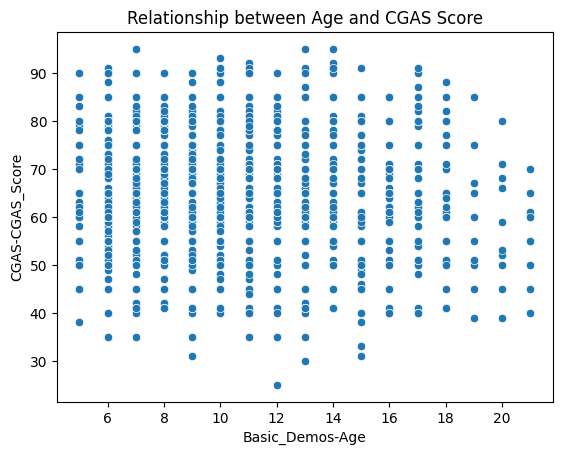

In [19]:
sns.scatterplot(data=train, x='Basic_Demos-Age', y='CGAS-CGAS_Score', palette='viridis')
plt.title("Relationship between Age and CGAS Score")
plt.show()

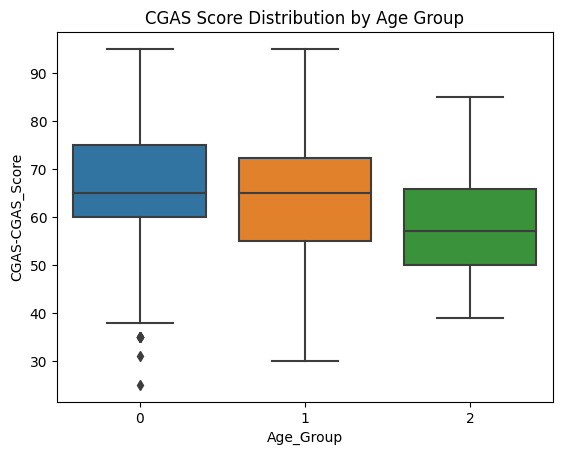

In [20]:
sns.boxplot(data=train, x='Age_Group', y='CGAS-CGAS_Score')
plt.title("CGAS Score Distribution by Age Group")
plt.show()

In [21]:
age_group_cgas_stats = train.groupby('Age_Group')['CGAS-CGAS_Score'].describe()
age_group_cgas_stats

,count,mean,std,min,25%,50%,75%,max
Age_Group,,,,,,,,
0,1782.0,65.457912,11.644084,25.0,60.0,65.0,75.00,95.0
1,516.0,64.488372,12.262100,30.0,55.0,65.0,72.25,95.0
2,30.0,57.866667,11.834297,39.0,50.0,57.0,65.75,85.0


Nhận xét không thực sự có mối liên hệ nào rõ ràng ở đây => Không thể dự đoán thông tin về CGAS-CGAS_Score từ độ tuổi 

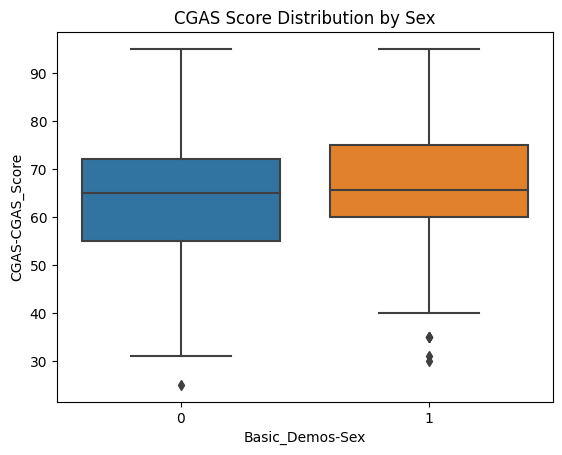

In [22]:
sns.boxplot(data=train, x='Basic_Demos-Sex', y='CGAS-CGAS_Score')
plt.title("CGAS Score Distribution by Sex")
plt.show()

In [23]:
sex_cgas_stats = train.groupby('Basic_Demos-Sex')['CGAS-CGAS_Score'].describe()
sex_cgas_stats

,count,mean,std,min,25%,50%,75%,max
Basic_Demos-Sex,,,,,,,,
0,1494.0,64.254351,11.417116,25.0,55.0,65.0,72.0,95.0
1,834.0,66.741007,12.349262,30.0,60.0,65.5,75.0,95.0


Nhận xét không thực sự có mối liên hệ nào rõ ràng ở đây => Không thể dự đoán thông tin về CGAS-CGAS_Score từ giới tính

## Mối quan hệ của PCIAT Total và CGAS Score

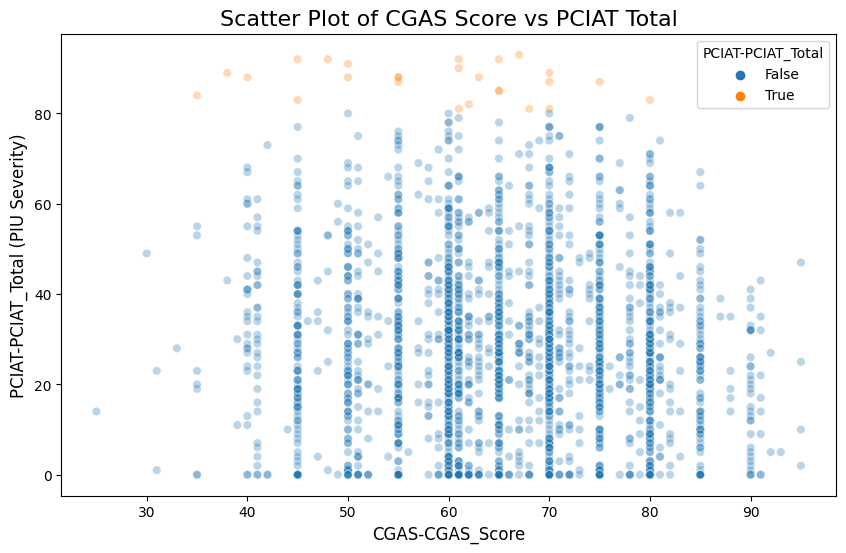

In [24]:
valid_data = train.dropna(subset=['CGAS-CGAS_Score', 'PCIAT-PCIAT_Total'])

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=valid_data, 
    x='CGAS-CGAS_Score', 
    y='PCIAT-PCIAT_Total',
    hue=valid_data['PCIAT-PCIAT_Total'] > 80,  # PCIAT severe group
    alpha=0.3
)

plt.title("Scatter Plot of CGAS Score vs PCIAT Total", fontsize=16)
plt.xlabel("CGAS-CGAS_Score", fontsize=12)
plt.ylabel("PCIAT-PCIAT_Total (PIU Severity)", fontsize=12)

plt.show()

### Nhận xét 
Có thể thấy rằng những người có chỉ số CGAS Score cao (>80) thì sẽ không gặp vấn đề lớn với việc sử dụng Internet (Sii = 3)

từ nhận xét trên chúng ta tạo một hàm trọng số tập trung vào nhóm CGAS > 80 (vì nhóm này không có PIU nghiêm trọng). Sử dụng hàm sigmoid nghịch đảo để gán trọng số cao hơn cho các trường hợp CGAS > 80.

In [25]:
def sigmoid_weight_cgas_high(cgas, a=0.2, b=80):
    return 1 / (1 + np.exp(-a * (cgas - b)))

## Các chỉ số vật lý 

In [26]:
physical_columns = [
 'Physical-BMI',
 'Physical-Height',
 'Physical-Weight',
 'Physical-Waist_Circumference',
 'Physical-Diastolic_BP',
 'Physical-HeartRate',
 'Physical-Systolic_BP'
]

wh_cols = [
    'Physical-BMI', 'Physical-Height',
    'Physical-Weight', 'Physical-Waist_Circumference'
]

heart_cols = [
 'Physical-Diastolic_BP',
 'Physical-HeartRate',
 'Physical-Systolic_BP'
]

calculate_stats(train, wh_cols)

,count,mean,std,min,25%,50%,75%,max,missing
Physical-BMI,2513.0,19.131766,4.914565,0.0,15.780022,17.823815,21.173921,46.102914,206
Physical-Height,2516.0,55.885688,7.389588,36.0,50.000000,55.000000,61.637500,78.500000,203
Physical-Weight,2557.0,87.859378,43.356403,0.0,57.200000,75.800000,111.400000,315.000000,162
Physical-Waist_Circumference,480.0,26.631250,5.225146,19.0,23.000000,26.000000,29.000000,50.000000,2239


In [27]:
(train[wh_cols] == 0).sum()

Physical-BMI                     7
Physical-Height                  0
Physical-Weight                 51
Physical-Waist_Circumference     0
dtype: int64

In [28]:
train[wh_cols] = train[wh_cols].replace(0, np.nan)
test[wh_cols] = test[wh_cols].replace(0, np.nan)
calculate_stats(train, wh_cols)

,count,mean,std,min,25%,50%,75%,max,missing
Physical-BMI,2506.0,19.185206,4.816095,8.522436,15.799058,17.842121,21.206149,46.102914,213
Physical-Height,2516.0,55.885688,7.389588,36.000000,50.000000,55.000000,61.637500,78.500000,203
Physical-Weight,2506.0,89.647418,41.924831,32.800000,58.200000,76.800000,112.200000,315.000000,213
Physical-Waist_Circumference,480.0,26.631250,5.225146,19.000000,23.000000,26.000000,29.000000,50.000000,2239


## Phân tích về mối liên hệ giữa cân nặng - chiều cao và các mùa

In [29]:
encoded_season_train = pd.get_dummies(train, columns=['Basic_Demos-Enroll_Season'], prefix='Season', drop_first=False)
encoded_season_test = pd.get_dummies(test, columns=['Basic_Demos-Enroll_Season'], prefix='Season', drop_first=False)
train = train.join(encoded_season_train[['Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter']])
test = test.join(encoded_season_test[['Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter']])
train.columns

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

In [30]:
train.groupby('Basic_Demos-Enroll_Season')[['Physical-Weight', 'Physical-Height']].mean()

,Physical-Weight,Physical-Height
Basic_Demos-Enroll_Season,,
Fall,88.344491,55.502040
Spring,87.942814,55.812538
Summer,90.484020,56.010065
Winter,92.070618,56.250434


In [31]:
train.groupby(['Basic_Demos-Enroll_Season', 'Basic_Demos-Sex'])[['Physical-Weight', 'Physical-Height']].mean()

Physical-Weight  Physical-Height
Basic_Demos-Enroll_Season Basic_Demos-Sex                                  
Fall                      0                      87.211184        55.427422
                          1                      90.429778        55.638458
Spring                    0                      88.242691        56.150742
                          1                      87.380870        55.181515
Summer                    0                      92.000529        56.250316
                          1                      87.980786        55.618240
Winter                    0                      92.120366        56.166554
                          1                      91.982407        56.399167

### Nhận xét

Cân nặng:

Trong từng mùa, nữ giới thường có cân nặng thấp hơn hoặc tương đương nam giới.
Ví dụ:

Mùa thu: 87.21 pounnd (nữ) so với 90.43 pound (nam)

Mùa đông: 92.12 pounnd (nữ) ≈ 91.98 pounnd (nam)

Cân nặng có xu hướng cao hơn vào mùa hè và đông, thấp hơn vào mùa thu và xuân, nhưng chênh lệch giữa các mùa không đáng kể (1–5 kg).

Chiều cao:

Nam giới luôn cao hơn nữ giới ở tất cả các mùa, nhưng khác biệt rất nhỏ (0.1–1 cm).
Ví dụ:

Mùa xuân: 55.18 inch (nữ) so với 56.15 inch (nam)

Mùa đông: 56.16 inch (nữ) so với 56.39 inch (nam)

Sự thay đổi chiều cao theo mùa gần như không đáng kể, chênh lệch tối đa khoảng 1 cm giữa các mùa.

=> Kết luận:

Cân nặng: Có sự khác biệt nhỏ theo mùa và giới tính, đặc biệt cao hơn vào mùa hè và đông. Tuy nhiên, các khác biệt này rất nhỏ và có thể bị ảnh hưởng bởi yếu tố khác như tuổi tác hoặc lối sống.

Chiều cao: Ảnh hưởng của mùa lên chiều cao gần như không đáng kể (chênh lệch trung bình < 1 cm).

Lưu ý: Do dữ liệu rất ít, chúng tôi vẫn sẽ sử dụng cả 3 cột mùa (season), tuổi (age) và giới tính (sex) để dự đoán giá trị thiếu của cân nặng (w) và chiều cao (h).

### Chuyển đổi sang cm và kg 
Chuyển đổi dữ liệu từ inch và pound sang cm và kg

In [32]:
lbs_to_kg = 0.453592
inches_to_cm = 2.54

def process_physical_BMI(df):
    df['Physical-Weight'] = df['Physical-Weight'] * lbs_to_kg
    df['Physical-Height'] = df['Physical-Height'] * inches_to_cm
    df['Physical-Waist_Circumference'] = df['Physical-Waist_Circumference'] * inches_to_cm
    
    df['Physical-BMI'] = np.where(
        df['Physical-Weight'].notna() & df['Physical-Height'].notna(),
        df['Physical-Weight'] / ((df['Physical-Height'] / 100) ** 2),
        np.nan
    )
    
    return df

train = process_physical_BMI(train)
test = process_physical_BMI(test)

calculate_stats(train, wh_cols)

,count,mean,std,min,25%,50%,75%,max,missing
Physical-BMI,2506.0,19.187090,4.816567,8.523273,15.800609,17.843872,21.208231,46.107439,213
Physical-Height,2516.0,141.949647,18.769553,91.440000,127.000000,139.700000,156.559250,199.390000,203
Physical-Weight,2506.0,40.663352,19.016768,14.877818,26.399054,34.835866,50.893022,142.881480,213
Physical-Waist_Circumference,480.0,67.643375,13.271871,48.260000,58.420000,66.040000,73.660000,127.000000,2239


## Thực hiện điền các giá trị bị thiếu của cân nặng và chiều cao bằng phương pháp KNN 
selected_features = ['Basic_Demos-Age', 'Season_Fall', 'Season_Winter', 'Basic_Demos-Sex', 'Physical-Weight', 'Physical-Height']

Chọn 2 mùa có ảnh hưởng nhiều nhất để tham gia dự đoán 


In [33]:
imputer = KNNImputer(n_neighbors=10)

selected_features = ['Basic_Demos-Age', 'Season_Fall', 'Season_Winter', 'Basic_Demos-Sex', 'Physical-Weight', 'Physical-Height']

imputed_data = imputer.fit_transform(train[selected_features])
train_imputed = pd.DataFrame(imputed_data, columns=selected_features)
train = train.drop(columns=selected_features).reset_index()

imputed_test_data = imputer.transform(test[selected_features])
test_imputed = pd.DataFrame(imputed_test_data, columns=selected_features)
test = test.drop(columns=selected_features).reset_index()

train = pd.concat([train, train_imputed], axis=1)
test = pd.concat([test, test_imputed], axis=1)

calculate_stats(train, ['Physical-Weight', 'Physical-Height'])

,count,mean,std,min,25%,50%,75%,max,missing
Physical-Weight,2719.0,40.718895,18.806414,14.877818,26.67121,34.745147,50.847663,142.88148,0
Physical-Height,2719.0,141.913875,18.671087,91.440000,127.13970,139.700000,156.210000,199.39000,0


## Tính lại chỉ số BMI dựa trên cân nặng và chiều cao 

In [34]:
train['Physical-BMI'] = train.apply(
    lambda row: row['Physical-Weight'] / (row['Physical-Height'] / 100) ** 2 
    if pd.isnull(row['Physical-BMI']) else row['Physical-BMI'], axis=1
)
test['Physical-BMI'] = test.apply(
    lambda row: row['Physical-Weight'] / (row['Physical-Height'] / 100) ** 2 
    if pd.isnull(row['Physical-BMI']) else row['Physical-BMI'], axis=1
)
calculate_stats(train, ['Physical-BMI'])

,count,mean,std,min,25%,50%,75%,max,missing
Physical-BMI,,,,,,,,,
Physical-BMI,2719.0,19.22914,4.693758,8.523273,15.954858,17.957047,21.289471,46.107439,0


So sánh với cột BIA-BIA_BMI 

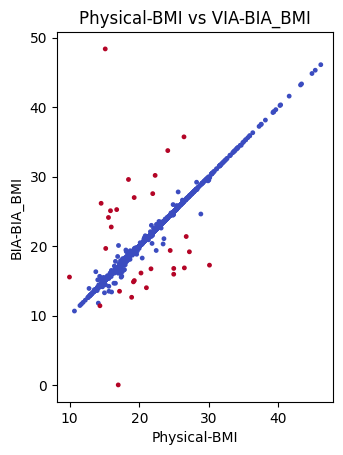

In [35]:
bmi_ratio = train['Physical-BMI'] / train['BIA-BIA_BMI']
color = (bmi_ratio < 0.8) | (bmi_ratio > 1.2)  # red if difference > 30%

plt.scatter(
    train['Physical-BMI'],
    train['BIA-BIA_BMI'],
    s=6,
    c=color,
    cmap='coolwarm'
)
plt.gca().set_aspect('equal')
plt.xlabel('Physical-BMI')
plt.ylabel('BIA-BIA_BMI')
plt.title('Physical-BMI vs VIA-BIA_BMI')
plt.show()

Ta thấy rằng những điểm màu đỏ có thể là những dữ liệu thiếu tin cậy ta tiến hành thay thế những điểm dữ liệu đó

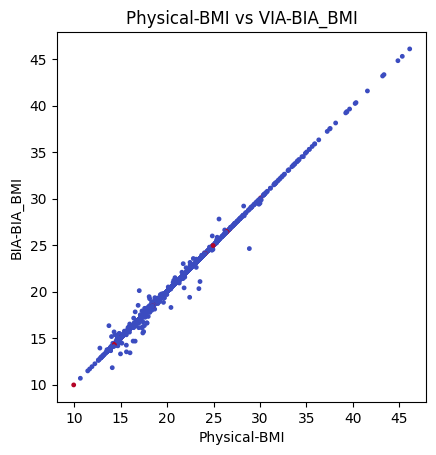

In [36]:
train.loc[color, 'BIA-BIA_BMI'] = train.loc[color, 'Physical-BMI']
plt.scatter(
    train['Physical-BMI'],
    train['BIA-BIA_BMI'],
    s=6,
    c=color,
    cmap='coolwarm'
)
plt.gca().set_aspect('equal')
plt.xlabel('Physical-BMI')
plt.ylabel('BIA-BIA_BMI')
plt.title('Physical-BMI vs VIA-BIA_BMI')
plt.show()

## Điền các giá trị bị thiếu của Physical-Waist_Circumference bằng LinearRegression

In [37]:
waist_data = train.dropna(subset=['Physical-Waist_Circumference'])

X = waist_data[['Physical-BMI', 'Physical-Weight']]
y = waist_data['Physical-Waist_Circumference']

from sklearn.linear_model import LinearRegression
waist_model = LinearRegression()
waist_model.fit(X, y)

LinearRegression()

In [38]:
missing_waist = train['Physical-Waist_Circumference'].isnull()
train.loc[missing_waist, 'Physical-Waist_Circumference'] = waist_model.predict(
    train.loc[missing_waist, ['Physical-BMI', 'Physical-Weight']]
)

missing_waist_test = test['Physical-Waist_Circumference'].isnull()
test.loc[missing_waist_test, 'Physical-Waist_Circumference'] = waist_model.predict(
    test.loc[missing_waist_test, ['Physical-BMI', 'Physical-Weight']]
)

calculate_stats(train, wh_cols)

,count,mean,std,min,25%,50%,75%,max,missing
Physical-BMI,2719.0,19.229140,4.693758,8.523273,15.954858,17.957047,21.289471,46.107439,0
Physical-Height,2719.0,141.913875,18.671087,91.440000,127.139700,139.700000,156.210000,199.390000,0
Physical-Weight,2719.0,40.718895,18.806414,14.877818,26.671210,34.745147,50.847663,142.881480,0
Physical-Waist_Circumference,2719.0,67.948114,12.081490,47.385325,59.050320,64.653554,73.660746,133.642999,0


## Huyết áp và nhịp tim 

In [39]:
bp_hr_cols = [
    'Physical-Diastolic_BP', 'Physical-Systolic_BP',
    'Physical-HeartRate'
]

In [40]:
(train[bp_hr_cols] < 50).sum()

Physical-Diastolic_BP    77
Physical-Systolic_BP      1
Physical-HeartRate       10
dtype: int64

In [41]:
train[train['Physical-Systolic_BP'] <= train['Physical-Diastolic_BP']][bp_hr_cols]

,Physical-Diastolic_BP,Physical-Systolic_BP,Physical-HeartRate
783,179.0,139.0,103.0
1292,117.0,114.0,114.0


In [42]:
train[bp_hr_cols] = train[bp_hr_cols].replace(0, np.nan)
train.loc[train['Physical-Systolic_BP'] <= train['Physical-Diastolic_BP'], bp_hr_cols] = np.nan

## Thang đo về giấc ngủ 

In [43]:
SDS_columns = ['SDS-Season', 'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T']

SDS_number_columns = ['SDS-SDS_Total_Raw', 'SDS-SDS_Total_T']

In [44]:
calculate_stats(train, 'SDS-Season')

,count (%)
SDS-Season,
NaN,206 (7.58%)
Fall,602 (22.14%)
Summer,598 (21.99%)
Winter,625 (22.99%)
Spring,688 (25.3%)


In [45]:
calculate_stats(train, SDS_number_columns)

,count,mean,std,min,25%,50%,75%,max,missing
SDS-SDS_Total_Raw,2513.0,40.987266,10.235631,17.0,33.0,39.0,46.0,96.0,206
SDS-SDS_Total_T,2511.0,57.658702,13.047179,38.0,47.0,55.0,64.0,100.0,208


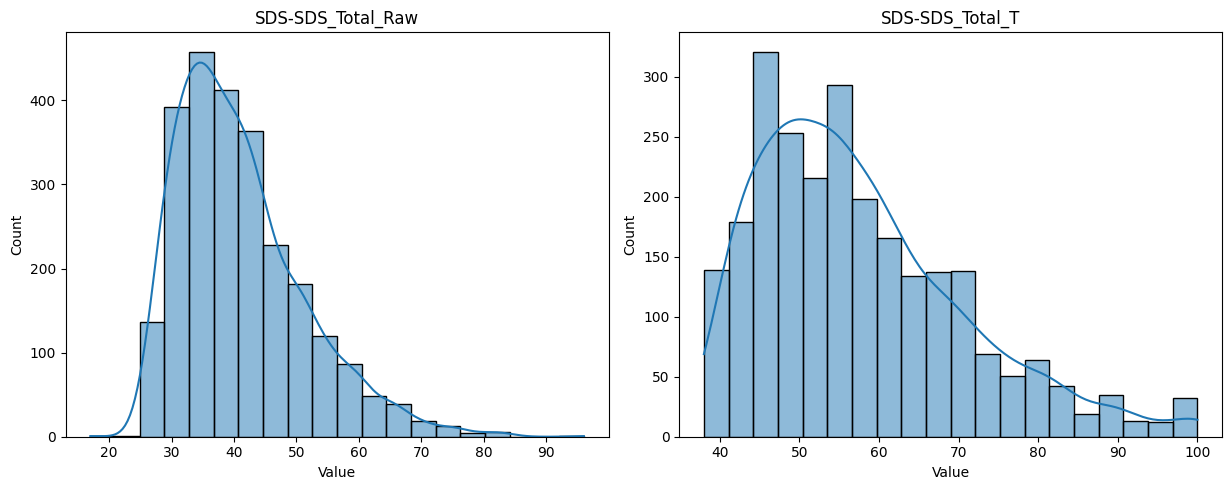

In [46]:
plt.figure(figsize=(18, 5))

# SDS-SDS_Total_Raw
plt.subplot(1, 3, 2)
sns.histplot(train['SDS-SDS_Total_Raw'].dropna(), bins=20, kde=True)
plt.title('SDS-SDS_Total_Raw')
plt.xlabel('Value')

# SDS-SDS_Total_T
plt.subplot(1, 3, 3)
sns.histplot(train['SDS-SDS_Total_T'].dropna(), bins=20, kde=True)
plt.title('SDS-SDS_Total_T')
plt.xlabel('Value')

plt.tight_layout()
plt.show()

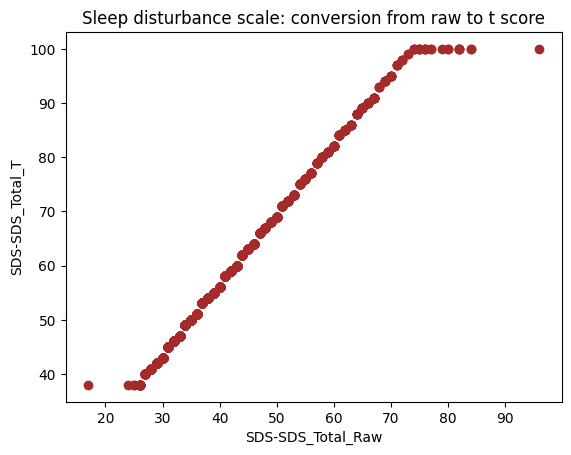

In [47]:
plt.title('Sleep disturbance scale: conversion from raw to t score')
plt.scatter(train['SDS-SDS_Total_Raw'],
            train['SDS-SDS_Total_T'],
            color='brown')
plt.xlabel('SDS-SDS_Total_Raw')
plt.ylabel('SDS-SDS_Total_T')
plt.show()

Hai cột SDS-SDS_Total_Raw và SDS-SDS_Total_T có nhiều điểm tương đồng. 

Cột SDS-SDS_Total_Raw sẽ mang nhiều thông tin hơn nên sẽ chỉ giữ lại cột này 

In [48]:
train = train.drop(columns=['SDS-SDS_Total_T'])
test = test.drop(columns=['SDS-SDS_Total_T'])

In [49]:
cols=['Basic_Demos-Age', 'Age_Group', 'SDS-SDS_Total_Raw', 'PCIAT-PCIAT_Total']
train[train['SDS-SDS_Total_Raw'] > 70][cols]

,Basic_Demos-Age,Age_Group,SDS-SDS_Total_Raw,PCIAT-PCIAT_Total
29,12.0,0,82.0,46.0
174,8.0,0,84.0,49.0
276,10.0,0,71.0,74.0
355,8.0,0,75.0,35.0
433,7.0,0,71.0,29.0
440,10.0,0,77.0,23.0
511,8.0,0,73.0,0.0
541,10.0,0,74.0,20.0
585,5.0,0,72.0,32.0
664,6.0,0,71.0,27.0


In [50]:
train[train['SDS-SDS_Total_Raw'] > 70].groupby('Age_Group').size()

Age_Group
0    28
1     4
2     0
dtype: int64

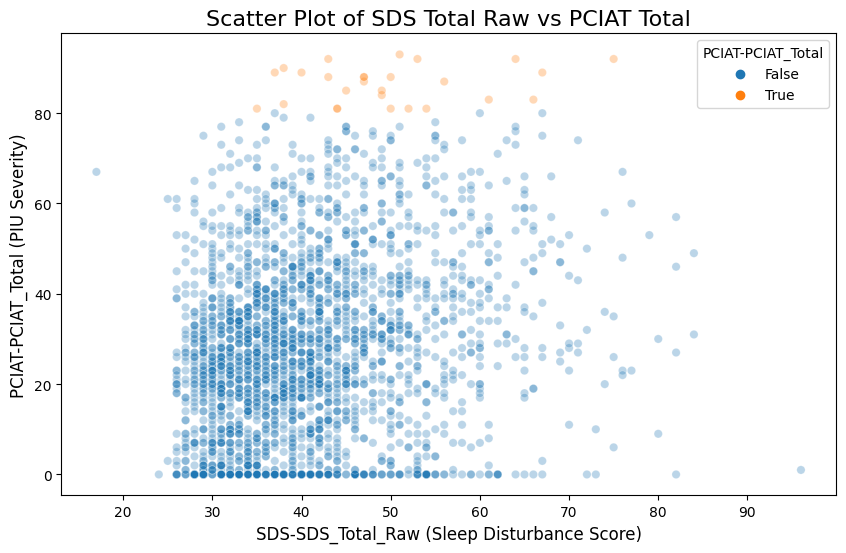

In [51]:
valid_data = train.dropna(subset=['SDS-SDS_Total_Raw', 'PCIAT-PCIAT_Total'])

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=valid_data, 
    x='SDS-SDS_Total_Raw', 
    y='PCIAT-PCIAT_Total',
    hue=valid_data['PCIAT-PCIAT_Total'] > 80,  # PCIAT severe group
    alpha=0.3
)

plt.title("Scatter Plot of SDS Total Raw vs PCIAT Total", fontsize=16)
plt.xlabel("SDS-SDS_Total_Raw (Sleep Disturbance Score)", fontsize=12)
plt.ylabel("PCIAT-PCIAT_Total (PIU Severity)", fontsize=12)

plt.show()

### Nhận xét 

Không có gì thực sự rõ ràng 

Những người không bị rối loạn giấc ngủ thì sẽ không bị ảnh hưởng nghiêm trọng bởi internet

## SDS-Season 

In [52]:
season_stats = train.groupby('SDS-Season')['SDS-SDS_Total_Raw'].agg(['mean', 'median'])
season_stats

,mean,median
SDS-Season,,
Fall,40.847176,38.0
Spring,40.866279,39.0
Summer,40.914716,39.0
Winter,41.324800,40.0


Thực hiện điền các giá trị bị thiếu theo phân phối của dữ liệu 

In [53]:
season_counts = train['SDS-Season'].value_counts(normalize=True)

train['SDS-Season'] = train['SDS-Season'].apply(
    lambda x: np.random.choice(season_counts.index, p=season_counts.values) if pd.isna(x) else x
)
test['SDS-Season'] = test['SDS-Season'].apply(
    lambda x: np.random.choice(season_counts.index, p=season_counts.values) if pd.isna(x) else x
)

calculate_stats(train, 'SDS-Season')

,count (%)
SDS-Season,
Summer,646 (23.76%)
Fall,649 (23.87%)
Winter,680 (25.01%)
Spring,744 (27.36%)


## Kiểm tra mối quan hệ của giới tính, độ tuổi và chỉ số SDS

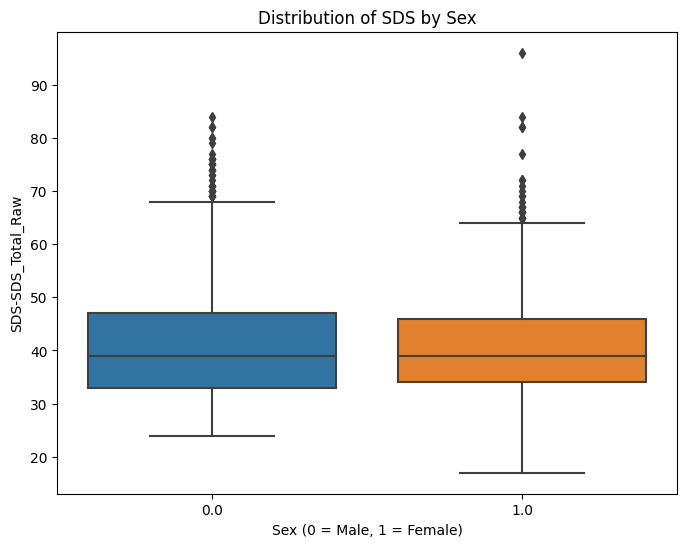

In [54]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Basic_Demos-Sex', y='SDS-SDS_Total_Raw', data=train)
plt.title('Distribution of SDS by Sex')
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.ylabel('SDS-SDS_Total_Raw')
plt.show()

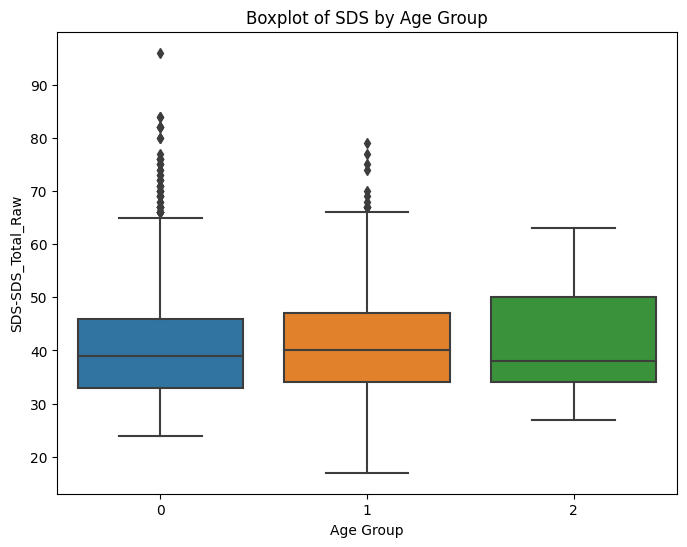

In [55]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age_Group', y='SDS-SDS_Total_Raw', data=train)
plt.title('Boxplot of SDS by Age Group')
plt.xlabel('Age Group')
plt.ylabel('SDS-SDS_Total_Raw')
plt.show()

 Chúng ta có thể thấy nhóm tuổi thanh niên 1 có trung bình cao nhất 

 Chúng ta sẽ xử dụng tuổi và mùa để dự đoán chỉ số SDS

## Thực hiện điền các giá trị bị thiếu của SDS-SDS_Total_Raw bằng phương pháp KNN

In [56]:
encoded_season_df = pd.get_dummies(train, columns=['SDS-Season'], prefix='SDS-Season', drop_first=False)
train = train.join(encoded_season_df[['SDS-Season_Fall', 'SDS-Season_Spring', 'SDS-Season_Summer', 'SDS-Season_Winter']])

encoded_season_df = pd.get_dummies(test, columns=['SDS-Season'], prefix='SDS-Season', drop_first=False)
test = test.join(encoded_season_df[['SDS-Season_Fall', 'SDS-Season_Spring', 'SDS-Season_Summer', 'SDS-Season_Winter']])

train.columns

Index(['index', 'id', 'Basic_Demos-Enroll_Season', 'CGAS-Season',
       'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Waist_Circumference', 'Physical-Diastolic_BP',
       'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM',
       'BIA-BIA_TBW', 'PAQ_A-Season', 'PAQ_A-PAQ_A

In [57]:
X_train_SDS_Score = train[['Basic_Demos-Age', 'SDS-Season_Fall', 'SDS-Season_Spring', 'SDS-Season_Winter']]
y_train_SDS_Score = train['SDS-SDS_Total_Raw']

In [58]:
sds_imputer = KNNImputer(n_neighbors=7)

data_with_sds = pd.concat([X_train_SDS_Score, y_train_SDS_Score], axis=1)

filled_data = sds_imputer.fit_transform(data_with_sds)

columns = data_with_sds.columns.tolist()
filled_df = pd.DataFrame(filled_data, columns=columns)

train['SDS-SDS_Total_Raw'] = filled_df['SDS-SDS_Total_Raw']
calculate_stats(train, ['SDS-SDS_Total_Raw'])

,count,mean,std,min,25%,50%,75%,max,missing
SDS-SDS_Total_Raw,,,,,,,,,
SDS-SDS_Total_Raw,2719.0,41.0424,9.872121,17.0,34.0,39.857143,46.0,96.0,0


In [59]:
X_test_SDS_Score = test[['Basic_Demos-Age', 'SDS-Season_Fall', 'SDS-Season_Spring', 'SDS-Season_Winter']]
y_test_SDS_Score = test['SDS-SDS_Total_Raw']

In [60]:
data_test_with_sds = pd.concat([X_test_SDS_Score, y_test_SDS_Score], axis=1)
filled_test_data = sds_imputer.transform(data_test_with_sds)
filled_test_df = pd.DataFrame(filled_test_data, columns=data_test_with_sds.columns)
test['SDS-SDS_Total_Raw'] = filled_test_df['SDS-SDS_Total_Raw']

## Thêm vào trọng số của SDS

In [61]:
def sigmoid_weight(sds, a=0.1, b=35):
    return 1 / (1 + np.exp(a * (sds - b)))

train['SDS_Weight'] = train['SDS-SDS_Total_Raw'].apply(sigmoid_weight)
test['SDS_Weight'] = test['SDS-SDS_Total_Raw'].apply(sigmoid_weight)
train[['SDS_Weight', 'SDS-SDS_Total_Raw']]

,SDS_Weight,SDS-SDS_Total_Raw
0,0.354344,41.0
1,0.249740,46.0
2,0.425557,38.0
3,0.598688,31.0
4,0.377541,40.0
...,...,...
2714,0.354344,41.0
2715,0.214165,48.0
2716,0.500000,35.0
2717,0.109097,56.0


## Internet Use

In [62]:
calculate_stats(train, 'PreInt_EduHx-Season')

,count (%)
PreInt_EduHx-Season,
Fall,683 (25.12%)
Summer,649 (23.87%)
Winter,648 (23.83%)
Spring,722 (26.55%)
NaN,17 (0.63%)


In [63]:
calculate_stats(train, ['PreInt_EduHx-computerinternet_hoursday'])

,count,mean,std,min,25%,50%,75%,max,missing
PreInt_EduHx-computerinternet_hoursday,,,,,,,,,
PreInt_EduHx-computerinternet_hoursday,2637.0,1.011756,1.080001,0.0,0.0,1.0,2.0,3.0,82


### Mối quan hệ dữ việc sử dụng Internet và độ tuổi, giới tính

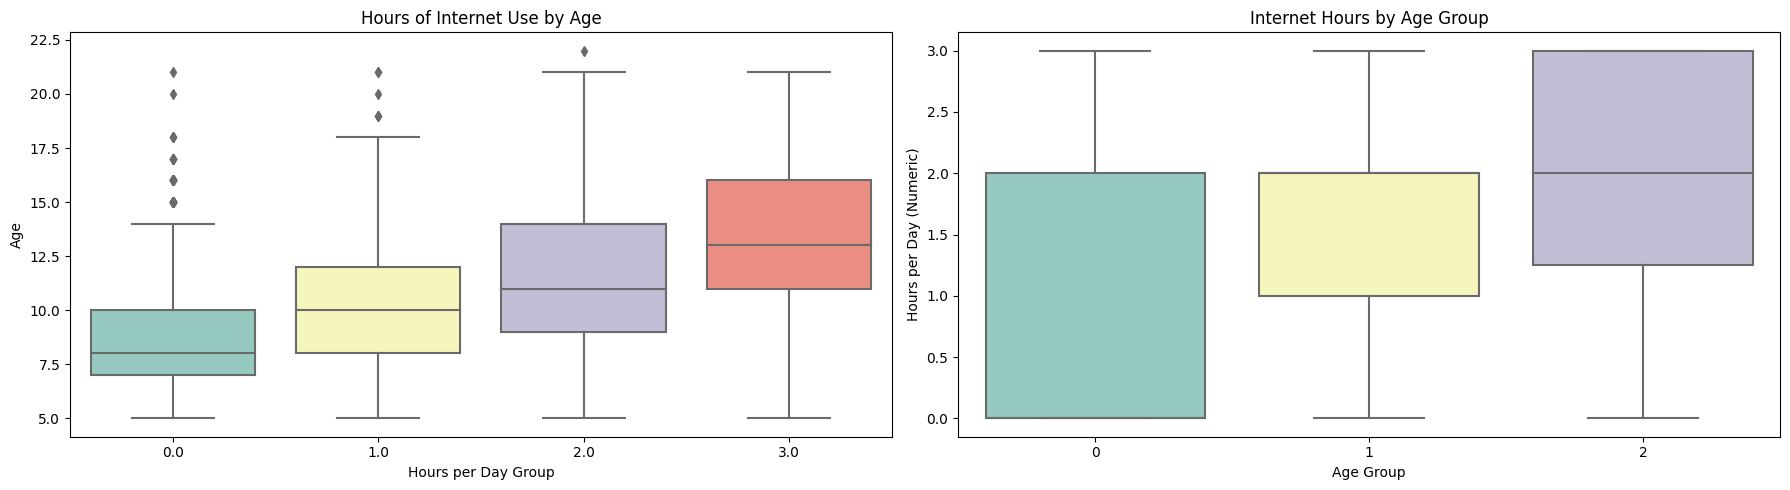

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Hours of Internet Use by Age
sns.boxplot(y=train['Basic_Demos-Age'], x=train['PreInt_EduHx-computerinternet_hoursday'], ax=axes[0], palette="Set3")
axes[0].set_title('Hours of Internet Use by Age')
axes[0].set_ylabel('Age')
axes[0].set_xlabel('Hours per Day Group')

# Hours of Internet Use by Age Group
sns.boxplot(y='PreInt_EduHx-computerinternet_hoursday', x='Age_Group', data=train, ax=axes[1], palette="Set3")
axes[1].set_title('Internet Hours by Age Group')
axes[1].set_ylabel('Hours per Day (Numeric)')
axes[1].set_xlabel('Age Group')

plt.tight_layout()
plt.show()

In [65]:
stats = train.groupby(['Basic_Demos-Sex', 'PreInt_EduHx-computerinternet_hoursday']
).size().unstack(fill_value=0)
stats_prop = stats.div(stats.sum(axis=1), axis=0) * 100

stats = stats.astype(str) +' (' + stats_prop.round(1).astype(str) + '%)'
stats

PreInt_EduHx-computerinternet_hoursday,0.0,1.0,2.0,3.0
Basic_Demos-Sex,,,,
0.0,793 (47.1%),224 (13.3%),505 (30.0%),160 (9.5%)
1.0,470 (49.2%),115 (12.0%),271 (28.4%),99 (10.4%)


### Nhận xét 

Nhóm tuổi càng lớn càng có thời gian xử dụng Internet nhiều hơn 

Giới tính không ảnh hưởng quá nhiều

### Mối quan hệ với chỉ số Sii

In [66]:
stats = train.groupby(
    ['sii', 'PreInt_EduHx-computerinternet_hoursday']
).size().unstack(fill_value=0)
stats_prop = stats.div(stats.sum(axis=1), axis=0) * 100

stats = stats.astype(str) +' (' + stats_prop.round(1).astype(str) + '%)'
stats

PreInt_EduHx-computerinternet_hoursday,0.0,1.0,2.0,3.0
sii,,,,
0.0,933 (60.8%),160 (10.4%),366 (23.9%),75 (4.9%)
1.0,247 (34.9%),123 (17.4%),251 (35.5%),86 (12.2%)
2.0,78 (21.5%),54 (14.9%),147 (40.6%),83 (22.9%)
3.0,5 (14.7%),2 (5.9%),12 (35.3%),15 (44.1%)


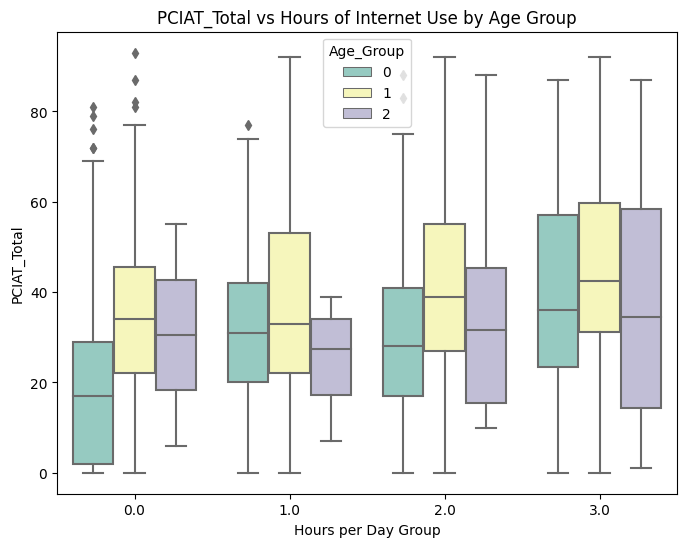

In [67]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='PreInt_EduHx-computerinternet_hoursday', y='PCIAT-PCIAT_Total',
    data=train,
    hue='Age_Group', palette="Set3"
)
plt.title('PCIAT_Total vs Hours of Internet Use by Age Group')
plt.ylabel('PCIAT_Total')
plt.xlabel('Hours per Day Group')
plt.show()

Không thực sự có mối quan hệ rõ ràng ở đây. Vì có những người ít xử dụng internet nhưng vẫn có mức sii cao

Ngược lại có những người dùng internet nhiều hơn 3 giờ một ngày nhưng vẫn có sii thấp

## Phân tích nhóm người xử dụng nhiều internet

In [68]:
high_sii_high_internet = train[(train['sii'] >= 2) & (train['PreInt_EduHx-computerinternet_hoursday'] >= 2)]
low_sii_high_internet = train[(train['sii'] < 2) & (train['PreInt_EduHx-computerinternet_hoursday'] >= 2)]

In [69]:
high_sii_means = [
    high_sii_high_internet['Basic_Demos-Age'].mean(),
    high_sii_high_internet['Basic_Demos-Sex'].mean(),
    high_sii_high_internet['Physical-Weight'].mean(),
    high_sii_high_internet['Physical-Height'].mean(),
    high_sii_high_internet['SDS-SDS_Total_Raw'].mean(),
    high_sii_high_internet['CGAS-CGAS_Score'].mean(),
    len(high_sii_high_internet),
]
low_sii_means = [
    low_sii_high_internet['Basic_Demos-Age'].mean(),
    low_sii_high_internet['Basic_Demos-Sex'].mean(),
    low_sii_high_internet['Physical-Weight'].mean(),
    low_sii_high_internet['Physical-Height'].mean(),
    low_sii_high_internet['SDS-SDS_Total_Raw'].mean(),
    low_sii_high_internet['CGAS-CGAS_Score'].mean(),
    len(low_sii_high_internet),
]

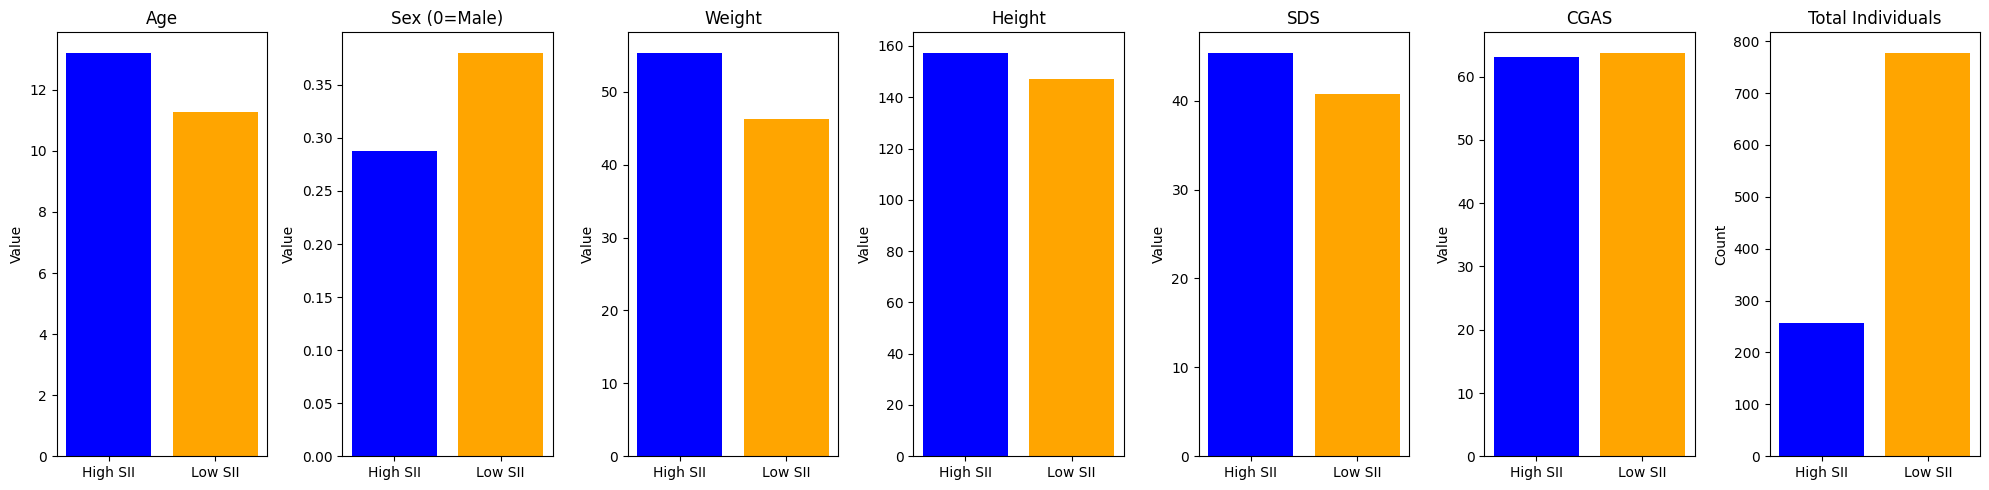

In [70]:
labels = ['Age', 'Sex (0=Male)', 'Weight', 'Height', 'SDS', 'CGAS', 'Total Individuals']

fig, axes = plt.subplots(1, 7, figsize=(20, 5), sharey=False)

for i, ax in enumerate(axes):
    ax.bar(['High SII', 'Low SII'], [high_sii_means[i], low_sii_means[i]], color=['blue', 'orange'])
    ax.set_title(labels[i])
    ax.set_ylabel('Value' if i != 6 else 'Count')

plt.tight_layout()
plt.show()

### Nhận xét 

Ta thấy rằng những người có độ tuổi lớn hơn sẽ có thời gian xử dụng Internet nhiều hơn 



## Phân tích nhóm người xử dụng nhiều internet

In [71]:
high_sii_low_internet = train[(train['sii'] >= 2) & (train['PreInt_EduHx-computerinternet_hoursday'] < 2)]
low_sii_low_internet = train[(train['sii'] < 2) & (train['PreInt_EduHx-computerinternet_hoursday'] < 2)]

In [72]:
high_sii_means = [
    high_sii_low_internet['Basic_Demos-Age'].mean(),
    high_sii_low_internet['Basic_Demos-Sex'].mean(),
    high_sii_low_internet['Physical-Weight'].mean(),
    high_sii_low_internet['Physical-Height'].mean(),
    high_sii_low_internet['SDS-SDS_Total_Raw'].mean(),
    high_sii_low_internet['CGAS-CGAS_Score'].mean(),
    len(high_sii_low_internet)
]
low_sii_means = [
    low_sii_low_internet['Basic_Demos-Age'].mean(),
    low_sii_low_internet['Basic_Demos-Sex'].mean(),
    low_sii_low_internet['Physical-Weight'].mean(),
    low_sii_low_internet['Physical-Height'].mean(),
    low_sii_low_internet['SDS-SDS_Total_Raw'].mean(),
    low_sii_low_internet['CGAS-CGAS_Score'].mean(),
    len(low_sii_low_internet)
]

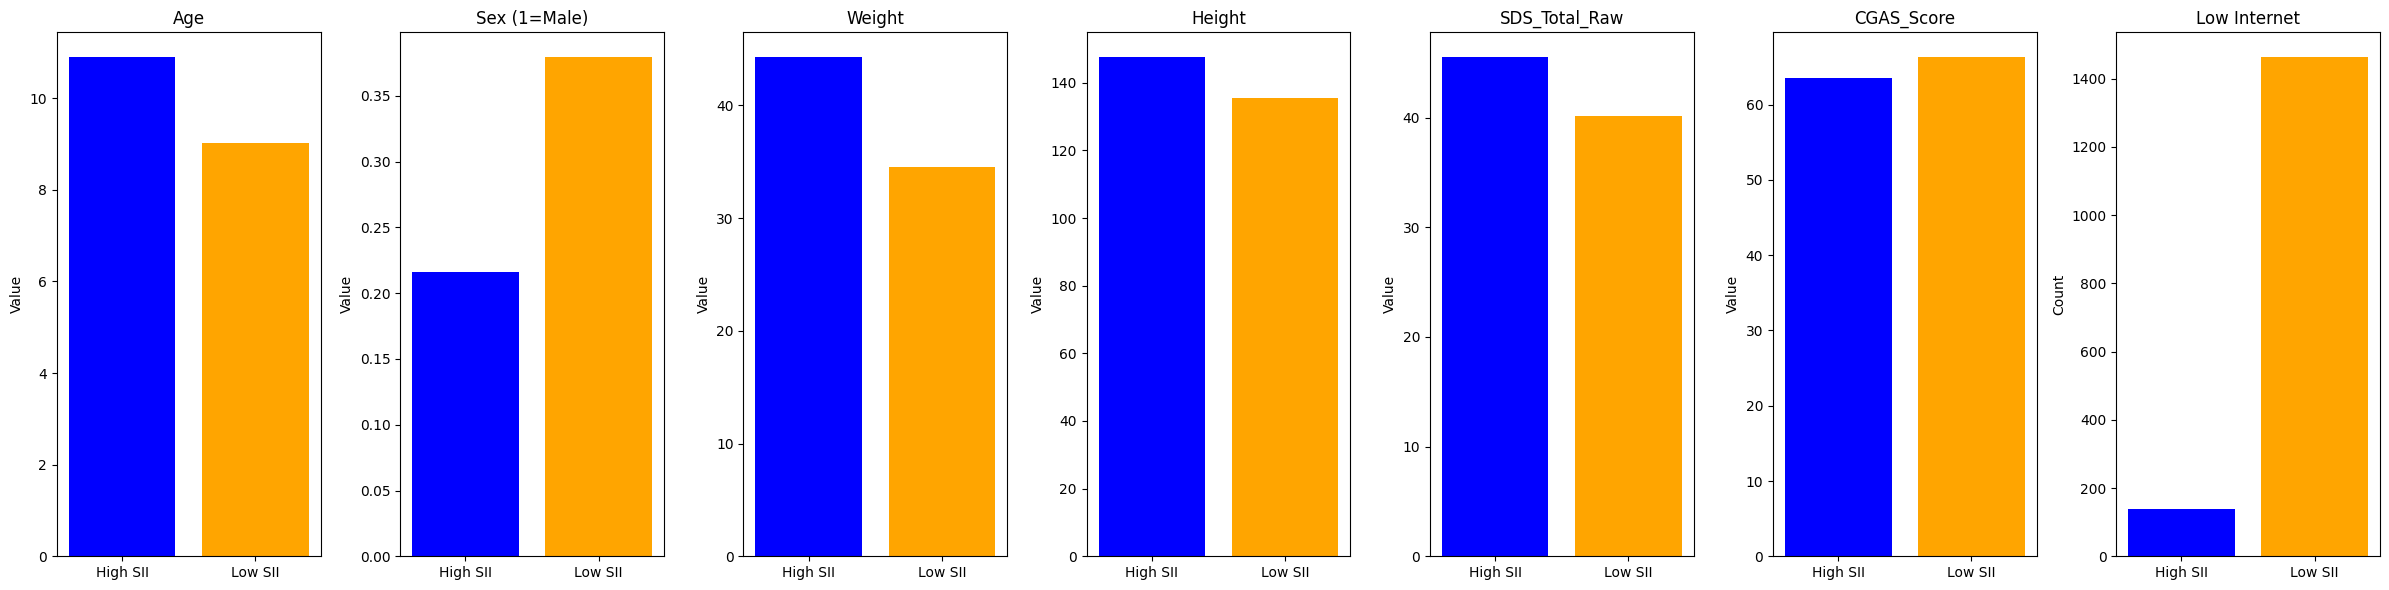

In [73]:
labels = ['Age', 'Sex (1=Male)', 'Weight', 'Height', 'SDS_Total_Raw', 'CGAS_Score', 'Total Individuals']

groups = ['High SII', 'Low SII']
data = [high_sii_means, low_sii_means]

fig, axes = plt.subplots(1, 7, figsize=(24, 6), sharey=False)

for i, ax in enumerate(axes):
    ax.bar(groups, [data[0][i], data[1][i]], color=['blue', 'orange'])
    ax.set_title(labels[i])
    ax.set_ylabel('Value' if i != 6 else 'Count')

plt.title('Low Internet')
plt.tight_layout()
plt.show()

### Nhận xét 

Trong các trường hợp thì số người gặp vấn đề với chỉ số sii có vẻ thấp hơn 



Chúng ta có thể tạo những đặc trưng với các cặp chỉ số như giới tính + thời gian sử dụng internet. Hay độ tuổi + thời gian sử dụng internet

## Điền các giá trị bị thiếu của cột PreInt_EduHx-Season

In [74]:
season_counts = train['PreInt_EduHx-Season'].value_counts(normalize=True)

train['PreInt_EduHx-Season'] = train['PreInt_EduHx-Season'].apply(lambda x: np.random.choice(season_counts.index, p=season_counts.values) if pd.isna(x) else x)
test['PreInt_EduHx-Season'] = test['PreInt_EduHx-Season'].apply(lambda x: np.random.choice(season_counts.index, p=season_counts.values) if pd.isna(x) else x)

calculate_stats(train, 'PreInt_EduHx-Season')

,count (%)
PreInt_EduHx-Season,
Fall,684 (25.16%)
Summer,655 (24.09%)
Winter,654 (24.05%)
Spring,726 (26.7%)


## Điền các giá trị bị thiếu của cột PreInt_EduHx-computerinternet_hoursday bằng logistic regression

In [75]:
features = ['Basic_Demos-Age', 'Basic_Demos-Sex', 'SDS-SDS_Total_Raw', 'PreInt_EduHx-Season']
target = 'PreInt_EduHx-computerinternet_hoursday'

train_data = train[train[target].notna()]

X_train = train_data[features]
y_train = train_data[target]

preprocessor = ColumnTransformer(
    transformers=[
        ('season', OneHotEncoder(), ['PreInt_EduHx-Season']),  # Mùa
        ('num', 'passthrough', ['Basic_Demos-Age', 'Basic_Demos-Sex', 'SDS-SDS_Total_Raw'])  # Các cột số
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, multi_class='ovr'))
])

model.fit(X_train, y_train)

X_missing = train[train[target].isna()][features]
predicted_values = model.predict(X_missing)

train.loc[train[target].isna(), target] = predicted_values

X_missing_test = test[test[target].isna()][features]
predicted_values_test = model.predict(X_missing_test)

test.loc[test[target].isna(), target] = predicted_values_test

calculate_stats(train, ['PreInt_EduHx-computerinternet_hoursday'])

,count,mean,std,min,25%,50%,75%,max,missing
PreInt_EduHx-computerinternet_hoursday,,,,,,,,,
PreInt_EduHx-computerinternet_hoursday,2719.0,1.006988,1.078737,0.0,0.0,1.0,2.0,3.0,0


## Hoạt động thể chất 

In [76]:
PAQ_Adolescents_columns = ['PAQ_A-Season', 'PAQ_A-PAQ_A_Total']
calculate_stats(train, 'PAQ_A-Season')

,count (%)
PAQ_A-Season,
NaN,2362 (86.87%)
Summer,95 (3.49%)
Spring,90 (3.31%)
Fall,77 (2.83%)
Winter,95 (3.49%)


In [77]:
calculate_stats(train, 'PAQ_A-PAQ_A_Total')

,count,mean,std,min,25%,50%,75%,max,missing
PAQ_A-PAQ_A_Total,,,,,,,,,
PAQ_A-PAQ_A_Total,357.0,2.184059,0.817494,0.66,1.52,2.08,2.78,4.54,2362


In [78]:
PAQ_Children_columns = ['PAQ_C-Season', 'PAQ_C-PAQ_C_Total']
calculate_stats(train, 'PAQ_C-Season')

,count (%)
PAQ_C-Season,
NaN,1284 (47.22%)
Fall,307 (11.29%)
Summer,341 (12.54%)
Winter,383 (14.09%)
Spring,404 (14.86%)


In [79]:
calculate_stats(train, 'PAQ_C-PAQ_C_Total')

,count,mean,std,min,25%,50%,75%,max,missing
PAQ_C-PAQ_C_Total,,,,,,,,,
PAQ_C-PAQ_C_Total,1435.0,2.591907,0.787015,0.58,2.02,2.55,3.16,4.79,1284


## Nhận xét: 
Đây là nhóm dữ liệu khá tệ vì thiết hụt quá nhiều 

## Phân tích trở kháng điện sinh học

In [80]:
bia_data_dict = data_dict[data_dict['Instrument'] == 'Bio-electric Impedance Analysis']
categorical_columns = bia_data_dict[bia_data_dict['Type'] == 'categorical int']['Field'].tolist()
continuous_columns = bia_data_dict[bia_data_dict['Type'] == 'float']['Field'].tolist()

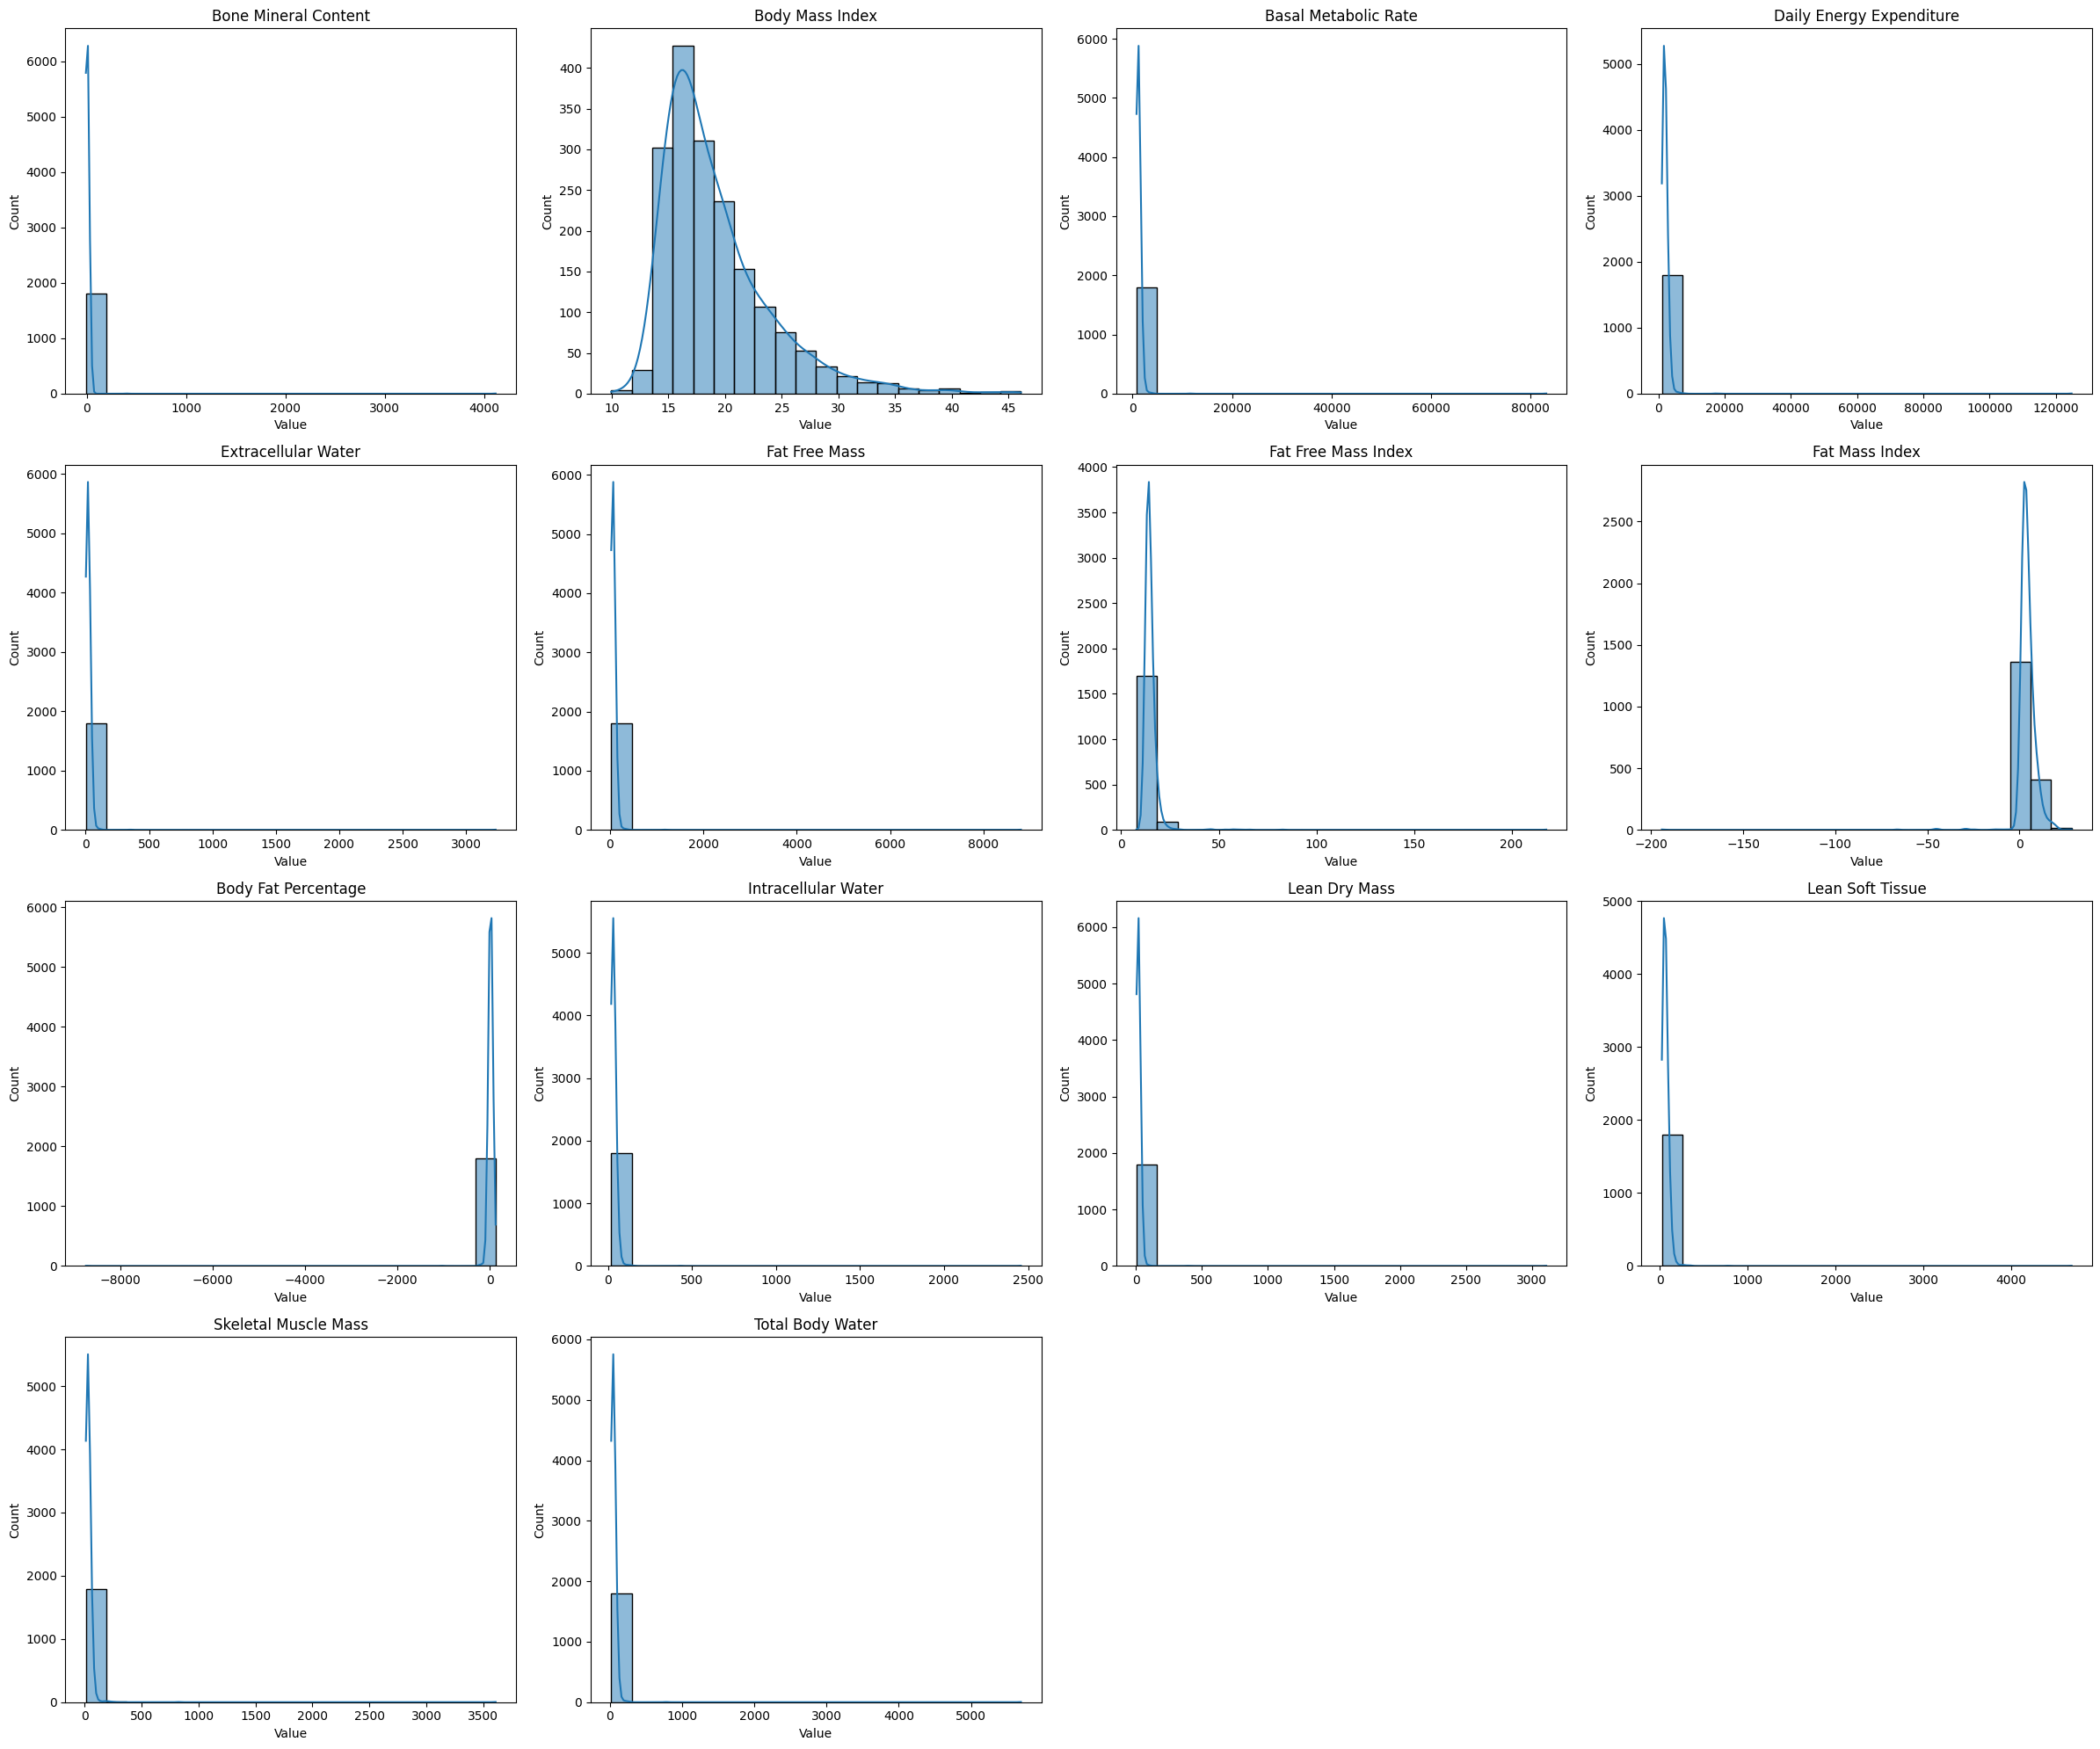

In [81]:
plt.figure(figsize=(24, 20))

for idx, col in enumerate(continuous_columns):
    plt.subplot(4, 4, idx + 1)
    sns.histplot(train[col].dropna(), bins=20, kde=True)
    plt.title(data_dict[data_dict['Field'] == col]['Description'].values[0])
    plt.xlabel('Value')

plt.tight_layout()
plt.show()

### Nhận xét: 
Dường như chỉ có chỉ số BMI có phân bố rõ ràng và đang tin cậy, chúng ta sẽ chỉ dùng dữ liệu này

In [82]:
for col in continuous_columns:
    if (col != 'BIA-BIA_BMI'):
        train = train.drop(columns=col)
        test = test.drop(columns=col)

## Time series

In [83]:
def process_file(filename, dirname):
    df = pd.read_parquet(os.path.join(dirname, filename, 'part-0.parquet'))
    df.drop('step', axis=1, inplace=True)
    return df.describe().values.reshape(-1), filename.split('=')[1]

def load_time_series(dirname) -> pd.DataFrame:
    ids = os.listdir(dirname)

    with ThreadPoolExecutor() as executor:
        results = list(tqdm(executor.map(lambda fname: process_file(fname, dirname), ids), total=len(ids)))

    stats, indexes = zip(*results)

    df = pd.DataFrame(stats, columns=[f"stat_{i}" for i in range(len(stats[0]))])
    df['id'] = indexes
    return df

train_ts = load_time_series("/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet")
test_ts = load_time_series("/kaggle/input/child-mind-institute-problematic-internet-use/series_test.parquet")

time_series_cols = train_ts.columns.tolist()
time_series_cols.remove("id")

train = pd.merge(train, train_ts, how="left", on='id')
test = pd.merge(test, test_ts, how="left", on='id')

# train = train.drop('id', axis=1)
# test = test.drop('id', axis=1)

100%|██████████| 2/2 [00:00<00:00,  8.37it/s]


#  Feature engineering

Encode unencoded season columns và xóa String columns

In [84]:
encoded_season_cols = ['Basic_Demos-Enroll_Season', 'SDS-Season']
non_encoded_season_cols = ['CGAS-Season', 'Physical-Season', 'Fitness_Endurance-Season', 
          'FGC-Season', 'BIA-Season', 'PAQ_A-Season', 'PAQ_C-Season', 'PreInt_EduHx-Season']

def remove_encoded_cols(df):
    return df.drop(columns=encoded_season_cols + ['Age_Group', 'index'])

train = remove_encoded_cols(train)
test = remove_encoded_cols(test)

def fillna_season(df):
    for c in non_encoded_season_cols: 
        df[c] = df[c].fillna('Missing')
        df[c] = df[c].astype('category')
    return df
        
train = fillna_season(train)
test = fillna_season(test)

def create_mapping(column, dataset):
    unique_values = dataset[column].unique()
    return {value: idx for idx, value in enumerate(unique_values)}

for col in non_encoded_season_cols:
    mapping_train = create_mapping(col, train)
    mapping_test = create_mapping(col, test)
    
    train[col] = train[col].replace(mapping_train).astype(int)
    test[col] = test[col].replace(mapping_test).astype(int)


train = train.drop(columns=question_columns + ['PCIAT-Season', 'PCIAT-PCIAT_Total'])

print(f'Train Shape : {train.shape} || Test Shape : {test.shape}')
train.head()

Train Shape : (2719, 149) || Test Shape : (20, 148)


,id,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMI,BIA-BIA_Frame_num,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-SDS_Total_Raw,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii,Season_Spring,Season_Summer,Basic_Demos-Age,Season_Fall,Season_Winter,Basic_Demos-Sex,Physical-Weight,Physical-Height,SDS-Season_Fall,SDS-Season_Spring,SDS-Season_Summer,SDS-Season_Winter,SDS_Weight,stat_0,stat_1,stat_2,stat_3,stat_4,stat_5,stat_6,stat_7,stat_8,stat_9,stat_10,stat_11,stat_12,stat_13,stat_14,stat_15,stat_16,stat_17,stat_18,stat_19,stat_20,stat_21,stat_22,stat_23,stat_24,stat_25,stat_26,stat_27,stat_28,stat_29,stat_30,stat_31,stat_32,stat_33,stat_34,stat_35,stat_36,stat_37,stat_38,stat_39,stat_40,stat_41,stat_42,stat_43,stat_44,stat_45,stat_46,stat_47,stat_48,stat_49,stat_50,stat_51,stat_52,stat_53,stat_54,stat_55,stat_56,stat_57,stat_58,stat_59,stat_60,stat_61,stat_62,stat_63,stat_64,stat_65,stat_66,stat_67,stat_68,stat_69,stat_70,stat_71,stat_72,stat_73,stat_74,stat_75,stat_76,stat_77,stat_78,stat_79,stat_80,stat_81,stat_82,stat_83,stat_84,stat_85,stat_86,stat_87,stat_88,stat_89,stat_90,stat_91,stat_92,stat_93,stat_94,stat_95
0,00008ff9,0,51.0,0,16.878972,58.833887,NaN,NaN,NaN,0,NaN,NaN,NaN,0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,0,2.0,16.879200,1.0,0,NaN,0,NaN,41.0,0,3.0,2.0,False,False,5.0,1.0,0.0,0.0,23.042474,116.84,False,False,True,False,0.354344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000fd460,0,NaN,0,14.036968,55.880000,75.0,70.0,122.0,0,NaN,NaN,NaN,0,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,1,2.0,14.037100,1.0,0,NaN,1,2.340,46.0,1,0.0,0.0,False,True,9.0,0.0,0.0,0.0,20.865232,121.92,True,False,False,False,0.249740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00105258,1,71.0,0,16.650330,62.557763,65.0,94.0,117.0,1,5.0,7.0,33.0,0,20.0,1.0,10.2,1.0,14.7,2.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,2,NaN,NaN,NaN,0,NaN,2,2.170,38.0,1,2.0,0.0,False,True,10.0,0.0,0.0,1.0,34.291555,143.51,True,False,False,False,0.425557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00115b9f,1,71.0,1,18.294143,65.504753,60.0,97.0,117.0,2,6.0,9.0,37.0,1,18.0,1.0,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,3,3.0,18.294300,2.0,0,NaN,3,2.451,31.0,2,0.0,1.0,False,False,9.0,0.0,1.0,0.0,37.013107,142.24,False,False,True,False,0.598688,43330.0,43330.0,43330.0,43330.0,43330.0,43330.0,43330.0,43330.0,43330.0,43330.0,43330.0,43330.0,-0.316384,0.016009,-0.167890,0.047388,-10.580416,0.000000,42.296310,4053.579102,5.046215e+13,4.470182,

In [85]:
def feature_engineering(df):
    #df['id'] = df['id']
    
    #Weight
    df['CGAS_Weight'] = df['CGAS-CGAS_Score'].apply(sigmoid_weight_cgas_high)
    df['SDS_Score_Weighted'] = df['SDS-SDS_Total_Raw'] * df['SDS_Weight']
    df['CGAS_Score_Weighted'] = df['CGAS-CGAS_Score'] * df['CGAS_Weight']
    df = df.drop(columns=['SDS-SDS_Total_Raw', 'SDS_Weight', 'CGAS-CGAS_Score', 'CGAS_Weight'])
    
    #Age
    df['Internet_Hours_Age'] = df['PreInt_EduHx-computerinternet_hoursday'] * df['Basic_Demos-Age']
    df['Physical-Waist_Age'] = df['Basic_Demos-Age'] * df['Physical-Waist_Circumference']
    df['BMI_Age'] = df['Physical-BMI'] * df['Basic_Demos-Age']
    df['Physical-Height_Age'] = df['Basic_Demos-Age'] * df['Physical-Height']

    #SDS
    df['SDS_BMI'] = df['Physical-BMI'] * df['SDS_Score_Weighted']
    df['CGAS_SDS'] = df['CGAS_Score_Weighted'] * df['SDS_Score_Weighted']
    df['CGAS_Endurance_Mins'] = df['CGAS_Score_Weighted'] * df['Fitness_Endurance-Time_Mins']
    df['SDS_Activity'] = df['BIA-BIA_Activity_Level_num'] * df['SDS_Score_Weighted']
    df['SDS_InternetHours'] = df['SDS_Score_Weighted'] * df['PreInt_EduHx-computerinternet_hoursday']

    df['BMI_Systolic_BP'] = df['Physical-BMI'] * df['Physical-Systolic_BP']
    df['Age_Systolic_BP'] = df['Basic_Demos-Age'] * df['Physical-Systolic_BP']
    df['PreInt_Systolic_BP'] = df['Physical-Systolic_BP'] * df['PreInt_EduHx-computerinternet_hoursday']
    df['PAQ_A_Activity'] = df['BIA-BIA_Activity_Level_num'] * df['PAQ_A-PAQ_A_Total']
    df['Activity_CU_PU'] = df['BIA-BIA_Activity_Level_num'] * df['FGC-FGC_CU'] * df['FGC-FGC_PU']

    #FGC
    df['FGC_CU_PU'] = df['FGC-FGC_CU'] * df['FGC-FGC_PU']
    df['FGC_CU_PU_Age'] = df['FGC-FGC_CU'] * df['FGC-FGC_PU'] * df['Basic_Demos-Age']
    df['FGC_GSND_GSD'] = df['FGC-FGC_GSND'] * df['FGC-FGC_GSD']
    df['FGC_GSND_GSD_Age'] = df['FGC-FGC_GSND'] * df['FGC-FGC_GSD'] * df['Basic_Demos-Age']
    df['CGAS_CU_PU'] = df['CGAS_Score_Weighted'] * df['FGC-FGC_CU'] * df['FGC-FGC_PU']
    df['PreInt_FGC_CU_PU'] = df['PreInt_EduHx-computerinternet_hoursday'] * df['FGC-FGC_CU'] * df['FGC-FGC_PU']
    df['Endurance_CU_PU'] = df['Fitness_Endurance-Time_Mins'] * df['FGC-FGC_CU'] * df['FGC-FGC_PU']
    return df

train = feature_engineering(train)
test = feature_engineering(test)

new_features = ['Internet_Hours_Age', 'Physical-Waist_Age', 'BMI_Age', 'Physical-Height_Age', 'SDS_InternetHours', 'SDS_BMI', 'CGAS_SDS', 'CGAS_Endurance_Mins', 'SDS_Activity', 'BMI_Systolic_BP', 'Age_Systolic_BP', 'PreInt_Systolic_BP', 'PAQ_A_Activity', 'Activity_CU_PU', 'FGC_CU_PU', 'FGC_CU_PU_Age', 'FGC_GSND_GSD', 'FGC_GSND_GSD_Age', 'CGAS_CU_PU', 'PreInt_FGC_CU_PU', 'Endurance_CU_PU', 'CGAS_Weight', 'SDS_Score_Weighted', 'CGAS_Score_Weighted']

In [86]:
simple_features = ['id', 'SDS_Score_Weighted', 'Internet_Hours_Age', 'Physical-Height_Age', 
                  'Basic_Demos-Sex', 'PreInt_FGC_CU_PU']

train = train[simple_features + ['sii']]
test = test[simple_features]

test

,id,SDS_Score_Weighted,Internet_Hours_Age,Physical-Height_Age,Basic_Demos-Sex,PreInt_FGC_CU_PU
0,00008ff9,14.021604,15.0,584.2000,0.0,0.0
1,000fd460,11.488035,0.0,1097.2800,0.0,0.0
2,00105258,16.171184,20.0,1435.1000,1.0,280.0
3,00115b9f,18.559317,0.0,1280.1600,0.0,0.0
4,0016bb22,12.718222,36.0,2928.5946,1.0,NaN
5,001f3379,15.101627,0.0,1964.6900,1.0,0.0
6,0038ba98,18.629311,30.0,1397.0000,0.0,54.0
7,0068a485,14.444524,20.0,1504.9500,1.0,0.0
8,0069fbed,14.106813,30.0,2659.7610,0.0,NaN
9,0083e397,14.360597,38.0,3091.2943,1.0,NaN


# LGBM from Scratch

In [87]:
import numpy as np
import pandas as pd
from math import e
from tqdm import tqdm

class Node:
    '''
    A node object that is recursively called within itself to construct a regression tree. Based on Tianqi Chen's LightGBM,
    the internal gain used to find the optimal split value uses both the gradient and hessian. This implementation uses
    Gradient One-Side Sampling (GOSS) from LightGBM to subsample instances, keeping all instances with large gradients
    and randomly sampling a fraction of instances with small gradients. Weighted quantile sketch and optimal leaf values
    follow Chen's description in "LightGBM: A Scalable Tree Boosting System". Sparsity-aware fitting and NA handling are
    not implemented in this version.

    Inputs
    ------------------------------------------------------------------------------------------------------------------
    x: pandas dataframe or numpy array of the training data
    gradient: negative gradient of the loss function
    hessian: second order derivative of the loss function
    idxs: used to keep track of samples within the tree structure
    subsample_cols: fraction of columns to randomly subsample at each node (complexity parameter)
    min_leaf: minimum number of samples for a node to be considered a node (complexity parameter)
    min_child_weight: sum of the hessian inside a node is a measure of purity (complexity parameter)
    depth: limits the number of layers in the tree
    lambda_: L2 regularization term on weights. Increasing this value will make the model more conservative.
    gamma: Minimum gain required to make a split, preventing overfitting.
    eps: Parameter for quantile weighted sketch (approx tree method), roughly (1 / eps) number of bins
    a: Fraction of instances with large gradients to keep in GOSS
    b: Fraction of remaining instances with small gradients to sample in GOSS
    sampled_idxs, large_gradient_idxs, small_gradient_sampled_idxs, adjusted_gradient, adjusted_hessian: GOSS parameters
    passed from parent nodes (None for root)
    '''

    def __init__(self, x, gradient, hessian, idxs, subsample_cols=0.8, min_leaf=5, min_child_weight=1, depth=10, 
                 lambda_=1, gamma=1, eps=0.1, a=0.4, b=0.6, sampled_idxs=None, large_gradient_idxs=None, 
                 small_gradient_sampled_idxs=None, adjusted_gradient=None, adjusted_hessian=None):
        # Ensure x is a numpy array for consistent indexing
        self.x = x.values if isinstance(x, pd.DataFrame) else x
        self.gradient, self.hessian = gradient, hessian
        self.idxs = idxs 
        self.depth = depth
        self.min_leaf = min_leaf
        self.lambda_ = lambda_
        self.gamma = gamma
        self.min_child_weight = min_child_weight
        self.row_count = len(idxs)
        self.col_count = self.x.shape[1]
        self.subsample_cols = subsample_cols
        self.eps = eps
        self.a = a
        self.b = b

        # GOSS implementation for instance sampling at the root node
        if sampled_idxs is None:  # Root node
            grad_magnitudes = np.abs(self.gradient[self.idxs])
            sorted_indices = np.argsort(-grad_magnitudes)  # Descending order
            n = len(self.idxs)
            top_a = int(self.a * n)
            self.large_gradient_idxs = self.idxs[sorted_indices[:top_a]]
            remaining_idxs = self.idxs[sorted_indices[top_a:]]
            sample_b = int(self.b * (n - top_a))
            self.small_gradient_sampled_idxs = np.random.choice(remaining_idxs, sample_b, replace=False)
            self.sampled_idxs = np.concatenate([self.large_gradient_idxs, self.small_gradient_sampled_idxs])
            # Adjust gradients and hessians for small-gradient instances
            self.adjusted_gradient = self.gradient.copy()
            self.adjusted_hessian = self.hessian.copy()
            multiplier = (1 - self.a) / self.b
            self.adjusted_gradient[self.small_gradient_sampled_idxs] *= multiplier
            self.adjusted_hessian[self.small_gradient_sampled_idxs] *= multiplier
        else:
            self.sampled_idxs = sampled_idxs
            self.large_gradient_idxs = large_gradient_idxs
            self.small_gradient_sampled_idxs = small_gradient_sampled_idxs
            self.adjusted_gradient = adjusted_gradient
            self.adjusted_hessian = adjusted_hessian

        # Random column subsampling
        self.column_subsample = np.random.permutation(self.col_count)[:round(self.subsample_cols * self.col_count)]
        
        self.val = self.compute_gamma(self.gradient[self.idxs], self.hessian[self.idxs])
        self.score = float('-inf')
        self.find_varsplit()
        
    def compute_gamma(self, gradient, hessian):
        '''
        Calculates the optimal leaf value equation (5) in "LightGBM: A Scalable Tree Boosting System"
        '''
        return -np.sum(gradient) / (np.sum(hessian) + self.lambda_)
        
    def find_varsplit(self):
        '''
        Scans through each subsampled column and calculates the best split point.
        The node is split at this point, and two new nodes are created if a valid split is found.
        '''
        for c in self.column_subsample:
            self.find_greedy_split(c)
        if self.is_leaf:
            return
        x = self.split_col
        lhs = np.nonzero(x <= self.split)[0]
        rhs = np.nonzero(x > self.split)[0]
        self.lhs = Node(x=self.x, gradient=self.gradient, hessian=self.hessian, idxs=self.idxs[lhs], 
                        min_leaf=self.min_leaf, depth=self.depth-1, lambda_=self.lambda_, gamma=self.gamma, 
                        min_child_weight=self.min_child_weight, eps=self.eps, subsample_cols=self.subsample_cols,
                        a=self.a, b=self.b, sampled_idxs=self.sampled_idxs, large_gradient_idxs=self.large_gradient_idxs,
                        small_gradient_sampled_idxs=self.small_gradient_sampled_idxs, 
                        adjusted_gradient=self.adjusted_gradient, adjusted_hessian=self.adjusted_hessian)
        self.rhs = Node(x=self.x, gradient=self.gradient, hessian=self.hessian, idxs=self.idxs[rhs], 
                        min_leaf=self.min_leaf, depth=self.depth-1, lambda_=self.lambda_, gamma=self.gamma, 
                        min_child_weight=self.min_child_weight, eps=self.eps, subsample_cols=self.subsample_cols,
                        a=self.a, b=self.b, sampled_idxs=self.sampled_idxs, large_gradient_idxs=self.large_gradient_idxs,
                        small_gradient_sampled_idxs=self.small_gradient_sampled_idxs, 
                        adjusted_gradient=self.adjusted_gradient, adjusted_hessian=self.adjusted_hessian)
        
    def find_greedy_split(self, var_idx):
        '''
        For a given feature, calculates the gain using GOSS-sampled instances, while checking split conditions
        on all instances. Updates the best score and split point if a better split is found.
        '''
        use_idxs = np.intersect1d(self.idxs, self.sampled_idxs)
        if len(use_idxs) == 0:
            return
        x_sampled = self.x[use_idxs, var_idx]
        
        for r in range(len(use_idxs)):
            split_value = x_sampled[r]
            lhs_all = self.x[self.idxs, var_idx] <= split_value
            rhs_all = self.x[self.idxs, var_idx] > split_value
            
            if (np.sum(lhs_all) < self.min_leaf or np.sum(rhs_all) < self.min_leaf or
                self.hessian[self.idxs[lhs_all]].sum() < self.min_child_weight or
                self.hessian[self.idxs[rhs_all]].sum() < self.min_child_weight):
                continue

            lhs_sampled = use_idxs[x_sampled <= split_value]
            rhs_sampled = use_idxs[x_sampled > split_value]
            
            lhs_gradient = self.adjusted_gradient[lhs_sampled].sum()
            lhs_hessian = self.adjusted_hessian[lhs_sampled].sum()
            rhs_gradient = self.adjusted_gradient[rhs_sampled].sum()
            rhs_hessian = self.adjusted_hessian[rhs_sampled].sum()
            
            curr_score = 0.5 * (
                (lhs_gradient**2 / (lhs_hessian + self.lambda_)) +
                (rhs_gradient**2 / (rhs_hessian + self.lambda_)) -
                ((lhs_gradient + rhs_gradient)**2 / (lhs_hessian + rhs_hessian + self.lambda_))
            ) - self.gamma
            
            if curr_score > self.score:
                self.var_idx = var_idx
                self.score = curr_score
                self.split = split_value
                
    def weighted_quantile_sketch(self, var_idx):
        '''
        LightGBM Mini-Version
        Approximates the exact greedy approach for larger datasets using equations (8) and (9) from
        "LightGBM: A Scalable Tree Boosting System". Uses sampled instances for gain calculation.
        '''
        use_idxs = np.intersect1d(self.idxs, self.sampled_idxs)
        if len(use_idxs) == 0:
            return
        x = self.x[use_idxs, var_idx]
        hessian_ = self.adjusted_hessian[use_idxs]
        df = pd.DataFrame({'feature': x, 'hess': hessian_})
        
        df.sort_values(by=['feature'], ascending=True, inplace=True)
        hess_sum = df['hess'].sum()
        df['rank'] = df.apply(lambda x: (1/hess_sum) * sum(df[df['feature'] < x['feature']]['hess']), axis=1)
        
        for row in range(df.shape[0]-1):
            rk_sk_j, rk_sk_j_1 = df['rank'].iloc[row:row+2]
            if abs(rk_sk_j - rk_sk_j_1) >= self.eps:
                continue
                
            split_value = (df['feature'].iloc[row+1] + df['feature'].iloc[row]) / 2
            lhs_all = self.x[self.idxs, var_idx] <= split_value
            rhs_all = self.x[self.idxs, var_idx] > split_value
            
            if (np.sum(lhs_all) < self.min_leaf or np.sum(rhs_all) < self.min_leaf or
                self.hessian[self.idxs[lhs_all]].sum() < self.min_child_weight or
                self.hessian[self.idxs[rhs_all]].sum() < self.min_child_weight):
                continue
                
            lhs_sampled = use_idxs[x <= split_value]
            rhs_sampled = use_idxs[x > split_value]
            
            lhs_gradient = self.adjusted_gradient[lhs_sampled].sum()
            lhs_hessian = self.adjusted_hessian[lhs_sampled].sum()
            rhs_gradient = self.adjusted_gradient[rhs_sampled].sum()
            rhs_hessian = self.adjusted_hessian[rhs_sampled].sum()
            
            curr_score = 0.5 * (
                (lhs_gradient**2 / (lhs_hessian + self.lambda_)) +
                (rhs_gradient**2 / (rhs_hessian + self.lambda_)) -
                ((lhs_gradient + rhs_gradient)**2 / (lhs_hessian + rhs_hessian + self.lambda_))
            ) - self.gamma
            
            if curr_score > self.score:
                self.var_idx = var_idx
                self.score = curr_score
                self.split = split_value
                
    def gain(self, lhs, rhs):
        '''
        Calculates the gain at a particular split point based on equation (7) from
        "LightGBM: A Scalable Tree Boosting System" using adjusted gradients and hessians.
        '''
        gradient = self.adjusted_gradient[self.idxs]
        hessian = self.adjusted_hessian[self.idxs]
        
        lhs_gradient = gradient[lhs].sum()
        lhs_hessian = hessian[lhs].sum()
        rhs_gradient = gradient[rhs].sum()
        rhs_hessian = hessian[rhs].sum()
        
        gain = 0.5 * (
            (lhs_gradient**2 / (lhs_hessian + self.lambda_)) +
            (rhs_gradient**2 / (rhs_hessian + self.lambda_)) -
            ((lhs_gradient + rhs_gradient)**2 / (lhs_hessian + rhs_hessian + self.lambda_))
        ) - self.gamma
        return gain
                
    @property
    def split_col(self):
        '''
        Splits a column 
        '''
        return self.x[self.idxs, self.var_idx]
                
    @property
    def is_leaf(self):
        '''
        Checks if node is a leaf
        '''
        return self.score == float('-inf') or self.depth <= 0                 

    def predict(self, x):
        # Convert to numpy array if it's a DataFrame
        if isinstance(x, pd.DataFrame):
            x = x.values
        return np.array([self.predict_row(xi) for xi in x])
    
    def predict_row(self, xi):
        if self.is_leaf:
            return self.val
        node = self.lhs if xi[self.var_idx] <= self.split else self.rhs
        return node.predict_row(xi)

class LightGBMTree:
    '''
    Wrapper class that provides a scikit learn interface to the recursive regression tree above
    
    Inputs
    ------------------------------------------------------------------------------------------------------------------
    x: pandas datframe or numpy array of the training data
    gradient: negative gradient of the loss function
    hessian: second order derivative of the loss function
    idxs: used to keep track of samples within the tree structure
    subsample_cols: is an implementation of layerwise column subsample randomizing the structure of the trees
    (complexity parameter)
    min_leaf: minimum number of samples for a node to be considered a node (complexity parameter)
    min_child_weight: sum of the heassian inside a node is a measure of purity (complexity parameter)
    depth: limits the number of layers in the tree
    lambda: L2 regularization term on weights. Increasing this value will make model more conservative.
    gamma: This parameter also prevents over fitting and is present in the the calculation of the gain (structure score). 
    As this is subtracted from the gain it essentially sets a minimum gain amount to make a split in a node.
    eps: This parameter is used in the quantile weighted sketch or 'approx' tree method roughly translates to 
    (1 / sketch_eps) number of bins
    
    Outputs
    --------------------------------------------------------------------------------------------------------------------
    A single tree object that will be used for gradient boosting.
    '''
    def fit(self, x, gradient, hessian, subsample_cols=0.8, min_leaf=5, min_child_weight=1, depth=10, lambda_=1, gamma=1, eps=0.1):
        # x can be either DataFrame or numpy array
        self.dtree = Node(x, gradient, hessian, np.array(np.arange(len(x))), subsample_cols, min_leaf, min_child_weight, depth, lambda_, gamma, eps)
        return self
    
    def predict(self, X):
        return self.dtree.predict(X)
       
class LightGBMRegressor:
    '''
    Full application of the LightGBM algorithm as described in "LightGBM: A Scalable Tree Boosting System" for 
    regression.

    Inputs
    ------------------------------------------------------------------------------------------------------------------
    x: pandas datframe or numpy array of the training data
    y: target values (continuous)
    subsample_cols: is an implementation of layerwise column subsample randomizing the structure of the trees
    (complexity parameter)
    min_leaf: minimum number of samples for a node to be considered a node (complexity parameter)
    min_child_weight: sum of the heassian inside a node is a measure of purity (complexity parameter)
    depth: limits the number of layers in the tree
    lambda: L2 regularization term on weights. Increasing this value will make model more conservative.
    gamma: This parameter also prevents over fitting and is present in the the calculation of the gain (structure score). 
    As this is subtracted from the gain it essentially sets a minimum gain amount to make a split in a node.
    eps: This parameter is used in the quantile weighted sketch or 'approx' tree method roughly translates to 
    (1 / sketch_eps) number of bins

    Outputs
    --------------------------------------------------------------------------------------------------------------------
    Trained LightGBM regressor that supports both DataFrame and numpy array inputs.
    '''
    def __init__(self):
        self.estimators = []
        self.feature_names = None
    
    # first order gradient mean squared error
    @staticmethod
    def grad(preds, labels):
        return(2*(preds-labels))
    
    # second order gradient logLoss
    @staticmethod
    def hess(preds, labels):
        '''
        hessian of mean squared error is a constant value of two 
        returns an array of twos
        '''
        return(np.full((preds.shape[0], 1), 2).flatten().astype('float64'))
    
    def _prepare_input(self, X):
        """
        Helper method to prepare input data - handles both DataFrame and numpy arrays
        Returns a numpy array and stores column names if available
        """
        if isinstance(X, pd.DataFrame):
            # Store feature names for later reference
            self.feature_names = X.columns.tolist()
            return X
        else:
            # If numpy array, no column names to store
            self.feature_names = None
            return X
    
    def fit(self, X, y, subsample_cols=0.8, min_child_weight=1, depth=5, min_leaf=5, learning_rate=0.01, boosting_rounds=150, lambda_=10, gamma=1, eps=0.1):
        # Prepare X for consistent handling
        X = self._prepare_input(X)
        
        # Convert y to numpy array if it's a pandas Series
        if isinstance(y, pd.Series):
            y = y.values
            
        self.X, self.y = X, y
        self.depth = depth
        self.subsample_cols = subsample_cols
        self.eps = eps
        self.min_child_weight = min_child_weight 
        self.min_leaf = min_leaf
        self.learning_rate = learning_rate
        self.boosting_rounds = boosting_rounds 
        self.lambda_ = lambda_
        self.gamma = gamma
    
        self.base_pred = np.full((X.shape[0], 1), np.mean(y)).flatten().astype('float64')
    
        for booster in tqdm(range(self.boosting_rounds), desc="Boosting Rounds"):
            Grad = self.grad(self.base_pred, self.y)
            Hess = self.hess(self.base_pred, self.y)
            boosting_tree = LightGBMTree().fit(self.X, Grad, Hess, depth=self.depth, min_leaf=self.min_leaf, lambda_=self.lambda_, gamma=self.gamma, eps=self.eps, min_child_weight=self.min_child_weight, subsample_cols=self.subsample_cols)
            self.base_pred += self.learning_rate * boosting_tree.predict(self.X)
            self.estimators.append(boosting_tree)
          
        return self
          
    def predict(self, X):
        # Prepare X for consistent handling (may be DataFrame or numpy array)
        X = self._prepare_input(X)
        
        pred = np.zeros(X.shape[0])
        
        for estimator in self.estimators:
            pred += self.learning_rate * estimator.predict(X) 
          
        return np.full((X.shape[0], 1), np.mean(self.y)).flatten().astype('float64') + pred
    
    def feature_importance(self):
        """
        Return feature importance if feature names are available
        """
        if not self.feature_names:
            return "Feature names not available. Input X was not a DataFrame during fit()."
        
        # Simple feature importance implementation (more sophisticated implementations can be added)
        # This is just an example placeholder
        importance = {}
        for name in self.feature_names:
            importance[name] = np.random.random()  # Replace with actual importance calculation
            
        return pd.DataFrame(importance.items(), columns=['Feature', 'Importance']).sort_values('Importance', ascending=False)

## Một số hàm hỗ trợ khác 
* quadratic_weigthed_kappa: Hàm tính điểm có trọng số. Đây là hàm được dùng tính điểm trong yêu cầu đề bài
* threshold_Rounder: Hàm làm tròn dựa trên thresholds đã được customize. Thay vì làm tròn ở 0.5, 1.5 và 2.5, chúng ta có thể tự tính ngưỡng làm tròn sao cho mô hình hoạt động tốt nhất.
* evaluate_predictions: Hàm này đánh giá điểm của mô hình dựa trên thresholds, sử dụng hàm threshold_Rounder để làm tròn giá trị dự đoán, sau đó tính điểm Kappa. Dùng để tối ưu hóa trong quá trình cải thiện mô hình.
* trainML: Hàm huấn luyện mô hình với StratifiedKFold. Fit từng fold, tính ngưỡng làm tròn tối ưu cho sau khi huấn luyện qua tất cả các fold, và dự đoán trên tập test, trả về kết quả dự đoán và ô hình đã fit

In [88]:
def quadratic_weighted_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights='quadratic')

def threshold_Rounder(oof_non_rounded, thresholds):
    return np.where(oof_non_rounded < thresholds[0], 0,
                    np.where(oof_non_rounded < thresholds[1], 1,
                             np.where(oof_non_rounded < thresholds[2], 2, 3)))

def evaluate_predictions(thresholds, y_true, oof_non_rounded):
    rounded_p = threshold_Rounder(oof_non_rounded, thresholds)
    return -quadratic_weighted_kappa(y_true, rounded_p)

def TrainML(model_ok, train_data, test_data):
    
    X = train_data.drop(['sii'], axis=1)
    y = train_data['sii']

    SKF = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=SEED)
    
    train_S = []
    test_S = []
    
    oof_non_rounded = np.zeros(len(y), dtype=float) 
    oof_rounded = np.zeros(len(y), dtype=int) 
    test_preds = np.zeros((len(test_data), n_splits))

    for fold, (train_idx, test_idx) in enumerate(tqdm(SKF.split(X, y), desc="Training Folds", total=n_splits)):
        X_train, X_val = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[test_idx]

        model = model_ok
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)

        oof_non_rounded[test_idx] = y_val_pred
        y_val_pred_rounded = y_val_pred.round(0).astype(int)
        oof_rounded[test_idx] = y_val_pred_rounded

        train_kappa = quadratic_weighted_kappa(y_train, y_train_pred.round(0).astype(int))
        val_kappa = quadratic_weighted_kappa(y_val, y_val_pred_rounded)

        train_S.append(train_kappa)
        test_S.append(val_kappa)
        
        test_preds[:, fold] = model.predict(test_data)
        
        print(f"Fold {fold+1} - Train QWK: {train_kappa:.4f}, Validation QWK: {val_kappa:.4f}")
        clear_output(wait=True)

    print(f"Mean Train QWK --> {np.mean(train_S):.4f}")
    print(f"Mean Validation QWK ---> {np.mean(test_S):.4f}")

    KappaOPtimizer = minimize(evaluate_predictions,
                              x0=[0.5, 1.5, 2.5], args=(y, oof_non_rounded), 
                              method='Nelder-Mead') # Nelder-Mead | # Powell
    assert KappaOPtimizer.success, "Optimization did not converge."
    
    oof_tuned = threshold_Rounder(oof_non_rounded, KappaOPtimizer.x)
    tKappa = quadratic_weighted_kappa(y, oof_tuned)

    print(f"----> || Optimized QWK SCORE :: {Fore.CYAN}{Style.BRIGHT} {tKappa:.3f}{Style.RESET_ALL}")

    tpm = test_preds.mean(axis=1)
    tpTuned = threshold_Rounder(tpm, KappaOPtimizer.x)
    
    submission = pd.DataFrame({
        'id': sample['id'],
        'sii': tpTuned
    })

    return submission,model

# Huấn luyện mô hình và đưa ra kết quả

In [89]:
SEED = 42
n_splits = 5

sample = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/sample_submission.csv')

In [90]:
# Initialize model with your parameters
LGBM = LightGBMRegressor()

X = train.drop(['sii'], axis=1)
y = train['sii']

final_submission,new_ensemble_model = TrainML(LGBM, train, test)

final_submission

Training Folds: 100%|██████████| 5/5 [1:28:41<00:00, 1064.22s/it]

Mean Train QWK --> 0.5123
Mean Validation QWK ---> 0.4870


----> || Optimized QWK SCORE ::  0.513


,id,sii
0,00008ff9,1
1,000fd460,0
2,00105258,0
3,00115b9f,0
4,0016bb22,2
5,001f3379,0
6,0038ba98,0
7,0068a485,0
8,0069fbed,2
9,0083e397,1


In [91]:
final_submission[['id', 'sii']].to_csv('submission.csv', index=False)